In [1]:
import os
from datetime import datetime, timedelta, timezone
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta

In [2]:
df0 = pd.read_csv("Version/3_MergedCSV_0.csv")
df1 = pd.read_csv("Version/3_MergedCSV_1.csv")
df2 = pd.read_csv("Version/3_MergedCSV_2.csv")
df3 = pd.read_csv("Version/3_MergedCSV_3.csv")
df4 = pd.read_csv("Version/3_MergedCSV_4.csv")

In [3]:
df1

,DEVICE_NAME,FIELD_ID,NODE_ID,OG_FILENAME,ISO8601_DATE,MERGE_FOLD_INDX,MERGE_CSV_ROW_INDX,TIMESTAMP,SHTC3.0.HUMIDITY,SHTC3.0.TEMPERATURE,...,ApogeeO2.0.OXYGEN,ApogeeO2.1.TEMPERATURE,ApogeeO2.1.REF,ApogeeO2.1.OXYGEN,Hedorah-NDIR.0.CO2,Hedorah-NDIR.0.HUMIDITY,Hedorah-NDIR.0.TEMPERATURE,Hedorah-NDIR.1.CO2,Hedorah-NDIR.1.HUMIDITY,Hedorah-NDIR.1.TEMPERATURE
0,Winter_Turf_Type_B_-_8,B-8,e00fce6893c0acfa1ee9ed4a,2001-01-01.1,2001-01-01T00:00:00Z,1,0,978307200,38.966370,15.927963,...,12.5625,1281.5625,2498.0625,11.8125,962.0,41.616821,5.389107,647.0,40.518188,6.382469
1,Winter_Turf_Type_B_-_8,B-8,e00fce6893c0acfa1ee9ed4a,2001-01-01.1,2001-01-01T00:05:00Z,1,1,978307500,32.043457,16.683655,...,12.5625,1270.3125,2498.2500,11.8125,1126.0,42.124939,5.303654,761.0,41.366577,5.848400
2,Winter_Turf_Type_B_-_8,B-8,e00fce6893c0acfa1ee9ed4a,2001-01-01.1,2001-01-01T00:21:01Z,1,2,978308461,24.736023,17.941360,...,12.3750,1248.9375,2498.2500,11.6250,1517.0,43.801880,5.135426,1027.0,43.206787,5.410469
3,Winter_Turf_Type_B_-_8,B-8,e00fce6893c0acfa1ee9ed4a,2001-01-01.1,2001-01-01T00:39:18Z,1,3,978309558,20.733643,19.757156,...,12.1875,1242.0000,2498.2500,11.6250,1783.0,45.072937,5.178150,1183.0,44.552612,5.608070
4,Winter_Turf_Type_B_-_8,B-8,e00fce6893c0acfa1ee9ed4a,2001-01-01.1,2001-01-01T00:55:19Z,1,4,978310519,18.853760,21.180420,...,12.1875,1241.6250,2498.2500,11.6250,1917.0,46.012878,5.263599,1257.0,45.558167,5.819027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99501,Winter_Turf_Type_B_-_2,B-2,e00fce68978c5c1897d17ac7,2022-05-21,2022-05-21T17:52:51Z,1,99501,1653155571,99.998474,23.490219,...,12.3750,1719.7500,2496.9375,12.7500,423.0,46.189880,22.431145,506.0,48.603821,22.588692
99502,Winter_Turf_Type_B_-_2,B-2,e00fce68978c5c1897d17ac7,2022-05-21,2022-05-21T23:18:14Z,1,99502,1653175094,99.998474,23.348694,...,12.3750,1718.8125,2496.9375,12.9375,419.0,43.692017,22.404442,515.0,45.870972,22.532616
99503,Winter_Turf_Type_B_-_2,B-2,e00fce68978c5c1897d17ac7,2022-05-22,2022-05-22T03:29:48Z,1,99503,1653190188,99.998474,23.474197,...,12.3750,1717.6875,2496.9375,12.7500,434.0,42.266846,22.375069,504.0,44.287109,22.505913
99504,Winter_Turf_Type_B_-_2,B-2,e00fce68978c5c1897d17ac7,2022-05-22,2022-05-22T03:32:48Z,1,99504,1653190368,99.998474,23.215179,...,12.3750,1718.8125,2496.9375,12.9375,424.0,41.952515,22.529945,544.0,43.969727,22.660789


In [4]:
df0

,DEVICE_NAME,FIELD_ID,NODE_ID,OG_FILENAME,ISO8601_DATE,MERGE_FOLD_INDX,MERGE_CSV_ROW_INDX,TIMESTAMP,Col_1,Col_2,...,Col_18,Col_19,Col_20,Col_21,Col_22,Col_23,Col_24,Col_25,Col_26,Col_27
0,Winter_Turf_Type_B_-_7,B-7,e00fce686ef282d1d03ac481,2000-00-00,2021-04-06T22:28:46Z,0,0,1617748126,4.003906,0.000000,...,7.0,433.0,12911.0,16879.0,1617.0000,2499.9375,0.5625,1607.8125,2498.6250,10.8750
1,Winter_Turf_Type_B_-_7,B-7,e00fce686ef282d1d03ac481,2001-01-01,2001-01-01T00:05:16Z,0,1,978307516,0.000000,-1.172161,...,0.0,400.0,11826.0,15724.0,1444.5000,2499.5625,11.2500,1441.6875,2499.0000,11.6250
2,Winter_Turf_Type_B_-_7,B-7,e00fce686ef282d1d03ac481,2001-01-01,2001-01-01T00:21:02Z,0,2,978308462,0.117188,-0.781441,...,0.0,400.0,12202.0,16081.0,1444.3125,2499.3750,11.2500,1442.0625,2499.0000,11.6250
3,Winter_Turf_Type_B_-_7,B-7,e00fce686ef282d1d03ac481,2001-01-01,2001-01-01T00:36:49Z,0,3,978309409,0.117188,-0.781441,...,0.0,400.0,12438.0,16335.0,1445.4375,2499.3750,11.0625,1443.3750,2499.0000,11.6250
4,Winter_Turf_Type_B_-_7,B-7,e00fce686ef282d1d03ac481,2001-01-01,2001-01-01T00:52:36Z,0,4,978310356,0.117188,-0.781441,...,0.0,400.0,12624.0,16555.0,1446.9375,2499.3750,11.0625,1445.0625,2499.0000,11.6250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109042,Winter_Turf_Type_B_-_1,B-1,e00fce6838cebdf42fc24391,2021-11-29,2021-11-30T05:05:14Z,0,109042,1638248714,0.351563,-0.781441,...,0.0,0.0,0.0,0.0,1701.9375,2498.6250,12.3750,1702.1250,2498.4375,12.1875
109043,Winter_Turf_Type_B_-_1,B-1,e00fce6838cebdf42fc24391,2021-11-29,2021-11-30T05:21:48Z,0,109043,1638249708,0.351563,-0.781441,...,0.0,0.0,0.0,0.0,1702.8750,2498.4375,12.3750,1702.5000,2498.2500,12.1875
109044,Winter_Turf_Type_B_-_1,B-1,e00fce6838cebdf42fc24391,2021-11-29,2021-11-30T05:37:43Z,0,109044,1638250663,0.351563,-0.781441,...,0.0,0.0,0.0,0.0,1702.5000,2498.6250,12.3750,1702.6875,2498.2500,12.1875
109045,Winter_Turf_Type_B_-_1,B-1,e00fce6838cebdf42fc24391,2021-11-29,2021-11-30T05:53:38Z,0,109045,1638251618,0.351563,-0.781441,...,0.0,0.0,0.0,0.0,1701.9375,2498.8125,12.3750,1702.8750,2498.2500,12.1875


In [5]:
dfs = [df0, df1, df2, df3, df4]

In [6]:
for df in dfs:
    print("\n")
    node_list = df["NODE_ID"].unique()
    for Nodes in node_list:
        Node = df[(df["NODE_ID"] == Nodes)]
        Device = len(Node["FIELD_ID"].unique())
        print(Nodes, Device)
        
        



e00fce686ef282d1d03ac481 1
e00fce6893c0acfa1ee9ed4a 1
e00fce68b13222b0287269a6 1
e00fce685b02f35fe13a0a2d 1
e00fce6856706b033b691f8b 1
e00fce682c26b88b84ab26f2 1
e00fce6891afbb6bddd89915 1
e00fce68978c5c1897d17ac7 1
e00fce68fb8a948ec07bb826 1
e00fce6838cebdf42fc24391 1


e00fce6893c0acfa1ee9ed4a 1
e00fce6838cebdf42fc24391 1
e00fce6891afbb6bddd89915 1
e00fce6856706b033b691f8b 1
e00fce682c26b88b84ab26f2 1
e00fce68fb8a948ec07bb826 1
e00fce68978c5c1897d17ac7 1


e00fce6829163099f836ae78 1
e00fce68c014249653ebc049 1
e00fce685fbaf1875773e915 1
e00fce68816c2bc59976cdf2 1
e00fce680a6e48dc7e83e00d 1
e00fce682a79a64999b7b409 1
e00fce6872ea077cd7ed9ca7 1
e00fce6844eb3e18a15dc07f 1
e00fce68206506b1159c8936 1
e00fce682699a15d165801b1 1
e00fce68ccb7400e1fb8aa98 1
e00fce68bc30b356017ceeac 1
e00fce68b6dc19eefd628b4e 1
e00fce68428e95de642bb0d9 1


e00fce68b6dc19eefd628b4e 1
e00fce680a6e48dc7e83e00d 1
e00fce68bc30b356017ceeac 1
e00fce68744c7380377ec9e4 1
e00fce68af529fe2d2d7c809 1
e00fce68f5490112d61b

In [7]:

def Ping_Finder_Total(Folder, Nodes, Device, Date_Start  = "m/d/yy", Date_End = "m/d/yy", Month_Start = [], Folder_col = [], Device_col = [], Node_col = [], Starttime = [],  
                Endtime = [], Expected_col = [], Actual_col = [], Rate_col = []):
    
        StartDoc = datetime.strptime(Date_Start, '%m/%d/%y')
      
        EndDoc = datetime.strptime(Date_End, '%m/%d/%y')
        
        while StartDoc < EndDoc:
            Time1 = Node[(Node["ISO8601_DATE"] >= (datetime(StartDoc.year, StartDoc.month, StartDoc.day, 
                                                            tzinfo = timezone.utc).isoformat())) 
                         & (Node["ISO8601_DATE"] < (datetime(StartDoc.year, StartDoc.month, StartDoc.day, 
                                                              tzinfo = timezone.utc) + relativedelta(months = +1)).isoformat())]
            
            Start = Time1["ISO8601_DATE"].min()
            End = Time1["ISO8601_DATE"].max()
            result = Time1["TIMESTAMP"].max()-Time1["TIMESTAMP"].min()
            if result == 0:
                print(Folder, Device, "Has only one collected date in "+ StartDoc.strftime("%b") + "/" + str(StartDoc.year) + "...")
                expected = 0
                actual = len(Time1)                                           
                rate = np.nan                      
                Folder_col.append(Folder)
                Device_col.append(Device)
                Node_col.append(Nodes)
                Starttime.append(Start)
                Endtime.append(End)
                Expected_col.append(expected)
                Actual_col.append(actual)
                Rate_col.append(rate)
                Month_Start.append(StartDoc.strftime("%b") + "/" + str(StartDoc.year))
            elif not np.isnan(result) and result != 0:
                expected = int(result/(60*15))                                ## Seconds to 15 minute intervals
                actual = len(Time1)                                           ## Length of time dataframe
                rate = round((actual/expected * 100), 2)                ## Percent  Rate
                if rate > 100:
                    rate = np.nan
                Folder_col.append(Folder)
                Device_col.append(Device)
                Node_col.append(Nodes)
                Starttime.append(Start)
                Endtime.append(End)
                Expected_col.append(expected)
                Actual_col.append(actual)
                Rate_col.append(rate)
                Month_Start.append(StartDoc.strftime("%b") + "/" + str(StartDoc.year))
                print("Done with ", Folder, Device, StartDoc.strftime("%b") + "/" + str(StartDoc.year), "dates..." )
            else:
                print(Folder, Device, " Has no collected dates", StartDoc.strftime("%b") + "/" + str(StartDoc.year) + "...")
            
            StartDoc = StartDoc + relativedelta(months = +1)



    
            
        
    

In [8]:

Folder_col = []
Device_col = []
Node_col = []
Month_Start = []
Starttime = []
Endtime = []
Expected_col = []
Actual_col = []
Rate_col = []

n = 0
for df in dfs:
    Folder = str(df["MERGE_FOLD_INDX"].iloc[0])
    node_list = df["NODE_ID"].unique()
    for Nodes in node_list:
        n = n + 1
        Node = df[(df["NODE_ID"] == Nodes)]
        Device = Node["FIELD_ID"].iloc[0]
        Ping_Finder_Total( Folder = Folder, Nodes = Nodes, Device = Device, Date_Start = "10/15/20", Date_End = "4/15/21", 
                    Month_Start = Month_Start, Folder_col = Folder_col, 
                    Device_col = Device_col, Node_col = Node_col, 
                    Starttime = Starttime,  Endtime = Endtime, 
                    Expected_col = Expected_col, Actual_col = Actual_col, Rate_col = Rate_col)
        Ping_Finder_Total( Folder = Folder, Nodes = Nodes, Device = Device, Date_Start = "10/15/21", Date_End = "4/15/22", 
                    Month_Start = Month_Start, Folder_col = Folder_col, 
                    Device_col = Device_col, Node_col = Node_col, 
                    Starttime = Starttime,  Endtime = Endtime, 
                    Expected_col = Expected_col, Actual_col = Actual_col, Rate_col = Rate_col)
        
TPR = pd.DataFrame({"FOLDER_INDEX":Folder_col,
                   "FIELD_ID":Device_col,
                   "MONTH_YEAR": Month_Start,
                    "NODE_ID":Node_col,
                   "START_DATE":Starttime,
                    "END_DATE":Endtime,
                   "EXPECTED_PACKAGES": Expected_col,
                   "OBSERVED_PACKAGES": Actual_col,
                   "RATE_SUCCESS": Rate_col})

print("Total Ping Finder Complete!!!")        

0 B-7  Has no collected dates Oct/2020...
Done with  0 B-7 Nov/2020 dates...
Done with  0 B-7 Dec/2020 dates...
Done with  0 B-7 Jan/2021 dates...
Done with  0 B-7 Feb/2021 dates...
Done with  0 B-7 Mar/2021 dates...
0 B-7  Has no collected dates Oct/2021...
0 B-7  Has no collected dates Nov/2021...
0 B-7  Has no collected dates Dec/2021...
0 B-7  Has no collected dates Jan/2022...
0 B-7  Has no collected dates Feb/2022...
0 B-7  Has no collected dates Mar/2022...
0 B-8  Has no collected dates Oct/2020...
Done with  0 B-8 Nov/2020 dates...
Done with  0 B-8 Dec/2020 dates...
Done with  0 B-8 Jan/2021 dates...
Done with  0 B-8 Feb/2021 dates...
Done with  0 B-8 Mar/2021 dates...
Done with  0 B-8 Oct/2021 dates...
0 B-8  Has no collected dates Nov/2021...
0 B-8  Has no collected dates Dec/2021...
0 B-8  Has no collected dates Jan/2022...
0 B-8  Has no collected dates Feb/2022...
0 B-8  Has no collected dates Mar/2022...
0 B-9  Has no collected dates Oct/2020...
Done with  0 B-9 Nov/2020 d

2 A-2  Has no collected dates Dec/2020...
2 A-2  Has no collected dates Jan/2021...
2 A-2  Has no collected dates Feb/2021...
2 A-2  Has no collected dates Mar/2021...
2 A-2  Has no collected dates Oct/2021...
2 A-2  Has no collected dates Nov/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Jan/2022...
2 A-2  Has no collected dates Feb/2022...
2 A-2  Has no collected dates Mar/2022...
Done with  2 A-1 Oct/2020 dates...
Done with  2 A-1 Nov/2020 dates...
Done with  2 A-1 Dec/2020 dates...
Done with  2 A-1 Jan/2021 dates...
Done with  2 A-1 Feb/2021 dates...
Done with  2 A-1 Mar/2021 dates...
2 A-1  Has no collected dates Oct/2021...
2 A-1  Has no collected dates Nov/2021...
2 A-1  Has no collected dates Dec/2021...
2 A-1  Has no collected dates Jan/2022...
2 A-1  Has no collected dates Feb/2022...
2 A-1  Has no collected dates Mar/2022...
Done with  2 A-7 Oct/2020 dates...
Done with  2 A-7 Nov/2020 dates...
Done with  2 A-7 Dec/2020 dates...
Done with  2 

Done with  3 A-31 Mar/2022 dates...
3 A-31  Has no collected dates Oct/2020...
3 A-31  Has no collected dates Nov/2020...
3 A-31  Has no collected dates Dec/2020...
3 A-31  Has no collected dates Jan/2021...
3 A-31  Has no collected dates Feb/2021...
3 A-31  Has no collected dates Mar/2021...
3 A-31  Has no collected dates Oct/2021...
Done with  3 A-31 Nov/2021 dates...
3 A-31  Has no collected dates Dec/2021...
3 A-31 Has only one collected date inJan/2022...
3 A-31 Has only one collected date inFeb/2022...
3 A-31 Has only one collected date inMar/2022...
3 A-16  Has no collected dates Oct/2020...
3 A-16  Has no collected dates Nov/2020...
3 A-16  Has no collected dates Dec/2020...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Feb/2021...
3 A-16  Has no collected dates Mar/2021...
3 A-16  Has no collected dates Oct/2021...
Done with  3 A-16 Nov/2021 dates...
3 A-16  Has no collected dates Dec/2021...
3 A-16  Has no collected dates Jan/2022...
3 A-16  Has no

Done with  3 A-26 Jan/2022 dates...
Done with  3 A-26 Feb/2022 dates...
Done with  3 A-26 Mar/2022 dates...
3 A-20  Has no collected dates Oct/2020...
3 A-20  Has no collected dates Nov/2020...
3 A-20  Has no collected dates Dec/2020...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has no collected dates Feb/2021...
3 A-20  Has no collected dates Mar/2021...
3 A-20  Has no collected dates Oct/2021...
Done with  3 A-20 Nov/2021 dates...
Done with  3 A-20 Dec/2021 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Feb/2022 dates...
Done with  3 A-20 Mar/2022 dates...
3 A-33  Has no collected dates Oct/2020...
3 A-33  Has no collected dates Nov/2020...
3 A-33  Has no collected dates Dec/2020...
3 A-33  Has no collected dates Jan/2021...
3 A-33  Has no collected dates Feb/2021...
3 A-33  Has no collected dates Mar/2021...
3 A-33  Has no collected dates Oct/2021...
Done with  3 A-33 Nov/2021 dates...
Done with  3 A-33 Dec/2021 dates...
Done with  3 A-33 Jan/2022 dates...
Do

In [9]:
TPR

,FOLDER_INDEX,FIELD_ID,MONTH_YEAR,NODE_ID,START_DATE,END_DATE,EXPECTED_PACKAGES,OBSERVED_PACKAGES,RATE_SUCCESS
0,0,B-7,Nov/2020,e00fce686ef282d1d03ac481,2020-11-16T17:28:52Z,2020-12-14T23:58:55Z,2714,1524,56.15
1,0,B-7,Dec/2020,e00fce686ef282d1d03ac481,2020-12-15T00:14:42Z,2021-01-14T23:49:47Z,2974,2801,94.18
2,0,B-7,Jan/2021,e00fce686ef282d1d03ac481,2021-01-15T00:05:34Z,2021-02-14T23:51:49Z,2975,2809,94.42
3,0,B-7,Feb/2021,e00fce686ef282d1d03ac481,2021-02-15T00:07:36Z,2021-03-14T23:55:23Z,2687,2539,94.49
4,0,B-7,Mar/2021,e00fce686ef282d1d03ac481,2021-03-15T00:11:08Z,2021-04-06T23:05:35Z,2203,2018,91.60
...,...,...,...,...,...,...,...,...,...
328,4,A-24,Jan/2022,e00fce68a0322349e64ec178,2022-01-15T00:00:22Z,2022-02-14T23:45:53Z,2975,2745,92.27
329,4,A-24,Feb/2022,e00fce68a0322349e64ec178,2022-02-15T00:06:27Z,2022-03-14T23:54:47Z,2687,2476,92.15
330,4,A-24,Mar/2022,e00fce68a0322349e64ec178,2022-03-15T00:12:37Z,2022-04-14T23:47:09Z,2974,2751,92.50
331,4,A-29,Jan/2022,e00fce68744c7380377ec9e4,2022-02-07T19:42:58Z,2022-02-14T23:58:44Z,689,637,92.45


In [10]:
#TPR.to_csv("Monthly_Package_Rate", index = False)

In [11]:

def Ping_Finder_Daily(Folder, Nodes, Device, Date_Start  = "m/d/yy", Date_End = "m/d/yy", Month_Start = [], Folder_col = [], Device_col = [], Node_col = [], Starttime = [],  
                Endtime = [], Expected_col = [], Actual_col = [], Rate_col = []):
    
        StartDoc = datetime.strptime(Date_Start, '%m/%d/%y')
      
        EndDoc = datetime.strptime(Date_End, '%m/%d/%y')
        
        while StartDoc < EndDoc:
            Time1 = Node[(Node["ISO8601_DATE"] >= (datetime(StartDoc.year, StartDoc.month, StartDoc.day, 
                                                            tzinfo = timezone.utc).isoformat())) 
                         & (Node["ISO8601_DATE"] < (datetime(StartDoc.year, StartDoc.month, StartDoc.day, 
                                                              tzinfo = timezone.utc) + timedelta(days = 1)).isoformat())]
            
            Start = Time1["ISO8601_DATE"].min()
            End = Time1["ISO8601_DATE"].max()
            result = Time1["TIMESTAMP"].max()-Time1["TIMESTAMP"].min()
            if result == 0:
                print(Folder, Device, "Has only one collected date in "+ StartDoc.strftime("%b") + "/" + str(StartDoc.year) + "...")
                expected = 0
                actual = len(Time1)                                           
                rate = np.nan                      
                Folder_col.append(Folder)
                Device_col.append(Device)
                Node_col.append(Nodes)
                Starttime.append(Start)
                Endtime.append(End)
                Expected_col.append(expected)
                Actual_col.append(actual)
                Rate_col.append(rate)
                Month_Start.append(StartDoc.strftime("%b") + "/" + str(StartDoc.year))
            elif not np.isnan(result) and result != 0:
                expected = int(result/(60*15))                          ## Seconds to 15 minute intervals
                if expected == 0:
                    expected = 1
                actual = len(Time1)                                           ## Length of time dataframe
                rate = round((actual/expected* 100), 2)                ## Percent  Rate
                if rate > 100:
                    rate = np.nan
                Folder_col.append(Folder)
                Device_col.append(Device)
                Node_col.append(Nodes)
                Starttime.append(Start)
                Endtime.append(End)
                Expected_col.append(expected)
                Actual_col.append(actual)
                Rate_col.append(rate)
                Month_Start.append(StartDoc.strftime("%b") + "/" + str(StartDoc.year))
                print("Done with ", Folder, Device, StartDoc.strftime("%b") + "/" + str(StartDoc.year), "dates..." )
            else:
                print(Folder, Device, " Has no collected dates", StartDoc.strftime("%b") + "/" + str(StartDoc.year) + "...")
            
            StartDoc = StartDoc + timedelta(days = 1)



In [12]:

Folder_col = []
Device_col = []
Node_col = []
Month_Start = []
Starttime = []
Endtime = []
Expected_col = []
Actual_col = []
Rate_col = []

n = 0
for df in dfs:
    Folder = str(df["MERGE_FOLD_INDX"].iloc[0])
    node_list = df["NODE_ID"].unique()
    for Nodes in node_list:
        n = n + 1
        Node = df[(df["NODE_ID"] == Nodes)]
        Device = Node["FIELD_ID"].iloc[0]
        Ping_Finder_Daily( Folder = Folder, Nodes = Nodes, Device = Device, Date_Start = "10/15/20", Date_End = "4/15/21", 
                    Month_Start = Month_Start, Folder_col = Folder_col, 
                    Device_col = Device_col, Node_col = Node_col, 
                    Starttime = Starttime,  Endtime = Endtime, 
                    Expected_col = Expected_col, Actual_col = Actual_col, Rate_col = Rate_col)
        Ping_Finder_Daily( Folder = Folder, Nodes = Nodes, Device = Device, Date_Start = "10/15/21", Date_End = "4/15/22", 
                    Month_Start = Month_Start, Folder_col = Folder_col, 
                    Device_col = Device_col, Node_col = Node_col, 
                    Starttime = Starttime,  Endtime = Endtime, 
                    Expected_col = Expected_col, Actual_col = Actual_col, Rate_col = Rate_col)
        
DPR = pd.DataFrame({"FOLDER_INDEX":Folder_col,
                   "FIELD_ID":Device_col,
                   "MONTH_YEAR": Month_Start,
                    "NODE_ID":Node_col,
                   "START_DATE":Starttime,
                    "END_DATE":Endtime,
                   "EXPECTED_PACKAGES": Expected_col,
                   "OBSERVED_PACKAGES": Actual_col,
                   "RATE_SUCCESS": Rate_col})

print("Daily Ping Finder Complete!!!")        

0 B-7  Has no collected dates Oct/2020...
0 B-7  Has no collected dates Oct/2020...
0 B-7  Has no collected dates Oct/2020...
0 B-7  Has no collected dates Oct/2020...
0 B-7  Has no collected dates Oct/2020...
0 B-7  Has no collected dates Oct/2020...
0 B-7  Has no collected dates Oct/2020...
0 B-7  Has no collected dates Oct/2020...
0 B-7  Has no collected dates Oct/2020...
0 B-7  Has no collected dates Oct/2020...
0 B-7  Has no collected dates Oct/2020...
0 B-7  Has no collected dates Oct/2020...
0 B-7  Has no collected dates Oct/2020...
0 B-7  Has no collected dates Oct/2020...
0 B-7  Has no collected dates Oct/2020...
0 B-7  Has no collected dates Oct/2020...
0 B-7  Has no collected dates Oct/2020...
0 B-7  Has no collected dates Nov/2020...
0 B-7  Has no collected dates Nov/2020...
0 B-7  Has no collected dates Nov/2020...
0 B-7  Has no collected dates Nov/2020...
0 B-7  Has no collected dates Nov/2020...
0 B-7  Has no collected dates Nov/2020...
0 B-7  Has no collected dates Nov/

0 B-7  Has no collected dates Dec/2021...
0 B-7  Has no collected dates Dec/2021...
0 B-7  Has no collected dates Dec/2021...
0 B-7  Has no collected dates Dec/2021...
0 B-7  Has no collected dates Dec/2021...
0 B-7  Has no collected dates Dec/2021...
0 B-7  Has no collected dates Dec/2021...
0 B-7  Has no collected dates Dec/2021...
0 B-7  Has no collected dates Dec/2021...
0 B-7  Has no collected dates Dec/2021...
0 B-7  Has no collected dates Dec/2021...
0 B-7  Has no collected dates Dec/2021...
0 B-7  Has no collected dates Dec/2021...
0 B-7  Has no collected dates Jan/2022...
0 B-7  Has no collected dates Jan/2022...
0 B-7  Has no collected dates Jan/2022...
0 B-7  Has no collected dates Jan/2022...
0 B-7  Has no collected dates Jan/2022...
0 B-7  Has no collected dates Jan/2022...
0 B-7  Has no collected dates Jan/2022...
0 B-7  Has no collected dates Jan/2022...
0 B-7  Has no collected dates Jan/2022...
0 B-7  Has no collected dates Jan/2022...
0 B-7  Has no collected dates Jan/

Done with  0 B-8 Feb/2021 dates...
Done with  0 B-8 Feb/2021 dates...
Done with  0 B-8 Feb/2021 dates...
Done with  0 B-8 Feb/2021 dates...
Done with  0 B-8 Feb/2021 dates...
Done with  0 B-8 Feb/2021 dates...
Done with  0 B-8 Feb/2021 dates...
Done with  0 B-8 Feb/2021 dates...
Done with  0 B-8 Feb/2021 dates...
Done with  0 B-8 Feb/2021 dates...
Done with  0 B-8 Feb/2021 dates...
Done with  0 B-8 Feb/2021 dates...
Done with  0 B-8 Feb/2021 dates...
Done with  0 B-8 Mar/2021 dates...
Done with  0 B-8 Mar/2021 dates...
Done with  0 B-8 Mar/2021 dates...
Done with  0 B-8 Mar/2021 dates...
Done with  0 B-8 Mar/2021 dates...
Done with  0 B-8 Mar/2021 dates...
Done with  0 B-8 Mar/2021 dates...
Done with  0 B-8 Mar/2021 dates...
Done with  0 B-8 Mar/2021 dates...
Done with  0 B-8 Mar/2021 dates...
Done with  0 B-8 Mar/2021 dates...
Done with  0 B-8 Mar/2021 dates...
Done with  0 B-8 Mar/2021 dates...
Done with  0 B-8 Mar/2021 dates...
Done with  0 B-8 Mar/2021 dates...
Done with  0 B-8 Mar

0 B-8  Has no collected dates Apr/2022...
0 B-8  Has no collected dates Apr/2022...
0 B-8  Has no collected dates Apr/2022...
0 B-8  Has no collected dates Apr/2022...
0 B-8  Has no collected dates Apr/2022...
0 B-8  Has no collected dates Apr/2022...
0 B-8  Has no collected dates Apr/2022...
0 B-8  Has no collected dates Apr/2022...
0 B-8  Has no collected dates Apr/2022...
0 B-8  Has no collected dates Apr/2022...
0 B-8  Has no collected dates Apr/2022...
0 B-8  Has no collected dates Apr/2022...
0 B-9  Has no collected dates Oct/2020...
0 B-9  Has no collected dates Oct/2020...
0 B-9  Has no collected dates Oct/2020...
0 B-9  Has no collected dates Oct/2020...
0 B-9  Has no collected dates Oct/2020...
0 B-9  Has no collected dates Oct/2020...
0 B-9  Has no collected dates Oct/2020...
0 B-9  Has no collected dates Oct/2020...
0 B-9  Has no collected dates Oct/2020...
0 B-9  Has no collected dates Oct/2020...
0 B-9  Has no collected dates Oct/2020...
0 B-9  Has no collected dates Oct/

0 B-9  Has no collected dates Nov/2021...
0 B-9  Has no collected dates Nov/2021...
0 B-9  Has no collected dates Nov/2021...
0 B-9  Has no collected dates Nov/2021...
0 B-9  Has no collected dates Nov/2021...
0 B-9  Has no collected dates Nov/2021...
0 B-9  Has no collected dates Nov/2021...
0 B-9  Has no collected dates Nov/2021...
0 B-9  Has no collected dates Nov/2021...
0 B-9  Has no collected dates Nov/2021...
0 B-9  Has no collected dates Nov/2021...
0 B-9  Has no collected dates Nov/2021...
0 B-9  Has no collected dates Nov/2021...
0 B-9  Has no collected dates Dec/2021...
0 B-9  Has no collected dates Dec/2021...
0 B-9  Has no collected dates Dec/2021...
0 B-9  Has no collected dates Dec/2021...
0 B-9  Has no collected dates Dec/2021...
0 B-9  Has no collected dates Dec/2021...
0 B-9  Has no collected dates Dec/2021...
0 B-9  Has no collected dates Dec/2021...
0 B-9  Has no collected dates Dec/2021...
0 B-9  Has no collected dates Dec/2021...
0 B-9  Has no collected dates Dec/

Done with  0 B-6 Jan/2021 dates...
Done with  0 B-6 Jan/2021 dates...
Done with  0 B-6 Jan/2021 dates...
Done with  0 B-6 Jan/2021 dates...
Done with  0 B-6 Jan/2021 dates...
Done with  0 B-6 Jan/2021 dates...
Done with  0 B-6 Jan/2021 dates...
Done with  0 B-6 Jan/2021 dates...
Done with  0 B-6 Jan/2021 dates...
Done with  0 B-6 Jan/2021 dates...
Done with  0 B-6 Jan/2021 dates...
Done with  0 B-6 Jan/2021 dates...
Done with  0 B-6 Jan/2021 dates...
Done with  0 B-6 Jan/2021 dates...
Done with  0 B-6 Jan/2021 dates...
Done with  0 B-6 Feb/2021 dates...
Done with  0 B-6 Feb/2021 dates...
Done with  0 B-6 Feb/2021 dates...
Done with  0 B-6 Feb/2021 dates...
Done with  0 B-6 Feb/2021 dates...
Done with  0 B-6 Feb/2021 dates...
Done with  0 B-6 Feb/2021 dates...
Done with  0 B-6 Feb/2021 dates...
Done with  0 B-6 Feb/2021 dates...
Done with  0 B-6 Feb/2021 dates...
Done with  0 B-6 Feb/2021 dates...
Done with  0 B-6 Feb/2021 dates...
Done with  0 B-6 Feb/2021 dates...
Done with  0 B-6 Feb

0 B-6  Has no collected dates Feb/2022...
0 B-6  Has no collected dates Feb/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/2022...
0 B-6  Has no collected dates Mar/

Done with  0 B-5 Apr/2021 dates...
Done with  0 B-5 Apr/2021 dates...
0 B-5  Has no collected dates Apr/2021...
0 B-5  Has no collected dates Apr/2021...
0 B-5  Has no collected dates Apr/2021...
0 B-5  Has no collected dates Apr/2021...
Done with  0 B-5 Apr/2021 dates...
Done with  0 B-5 Apr/2021 dates...
Done with  0 B-5 Apr/2021 dates...
0 B-5  Has no collected dates Oct/2021...
0 B-5  Has no collected dates Oct/2021...
0 B-5  Has no collected dates Oct/2021...
0 B-5  Has no collected dates Oct/2021...
0 B-5  Has no collected dates Oct/2021...
0 B-5  Has no collected dates Oct/2021...
0 B-5  Has no collected dates Oct/2021...
0 B-5  Has no collected dates Oct/2021...
0 B-5  Has no collected dates Oct/2021...
0 B-5  Has no collected dates Oct/2021...
0 B-5  Has no collected dates Oct/2021...
0 B-5  Has no collected dates Oct/2021...
0 B-5  Has no collected dates Oct/2021...
0 B-5  Has no collected dates Oct/2021...
0 B-5  Has no collected dates Oct/2021...
0 B-5  Has no collected dat

0 B-4  Has no collected dates Oct/2020...
0 B-4  Has no collected dates Oct/2020...
0 B-4  Has no collected dates Oct/2020...
0 B-4  Has no collected dates Oct/2020...
0 B-4  Has no collected dates Oct/2020...
0 B-4  Has no collected dates Oct/2020...
0 B-4  Has no collected dates Oct/2020...
0 B-4  Has no collected dates Oct/2020...
0 B-4  Has no collected dates Nov/2020...
0 B-4  Has no collected dates Nov/2020...
0 B-4  Has no collected dates Nov/2020...
0 B-4  Has no collected dates Nov/2020...
0 B-4  Has no collected dates Nov/2020...
0 B-4  Has no collected dates Nov/2020...
0 B-4  Has no collected dates Nov/2020...
0 B-4  Has no collected dates Nov/2020...
0 B-4  Has no collected dates Nov/2020...
0 B-4  Has no collected dates Nov/2020...
0 B-4  Has no collected dates Nov/2020...
0 B-4  Has no collected dates Nov/2020...
0 B-4  Has no collected dates Nov/2020...
0 B-4  Has no collected dates Nov/2020...
0 B-4  Has no collected dates Nov/2020...
Done with  0 B-4 Nov/2020 dates...

0 B-4  Has no collected dates Dec/2021...
0 B-4  Has no collected dates Dec/2021...
0 B-4  Has no collected dates Dec/2021...
0 B-4  Has no collected dates Dec/2021...
0 B-4  Has no collected dates Dec/2021...
0 B-4  Has no collected dates Jan/2022...
0 B-4  Has no collected dates Jan/2022...
0 B-4  Has no collected dates Jan/2022...
0 B-4  Has no collected dates Jan/2022...
0 B-4  Has no collected dates Jan/2022...
0 B-4  Has no collected dates Jan/2022...
0 B-4  Has no collected dates Jan/2022...
0 B-4  Has no collected dates Jan/2022...
0 B-4  Has no collected dates Jan/2022...
0 B-4  Has no collected dates Jan/2022...
0 B-4  Has no collected dates Jan/2022...
0 B-4  Has no collected dates Jan/2022...
0 B-4  Has no collected dates Jan/2022...
0 B-4  Has no collected dates Jan/2022...
0 B-4  Has no collected dates Jan/2022...
0 B-4  Has no collected dates Jan/2022...
0 B-4  Has no collected dates Jan/2022...
0 B-4  Has no collected dates Jan/2022...
0 B-4  Has no collected dates Jan/

Done with  0 B-12 Jan/2021 dates...
Done with  0 B-12 Jan/2021 dates...
Done with  0 B-12 Jan/2021 dates...
Done with  0 B-12 Jan/2021 dates...
Done with  0 B-12 Jan/2021 dates...
Done with  0 B-12 Jan/2021 dates...
Done with  0 B-12 Jan/2021 dates...
Done with  0 B-12 Jan/2021 dates...
Done with  0 B-12 Jan/2021 dates...
Done with  0 B-12 Feb/2021 dates...
Done with  0 B-12 Feb/2021 dates...
Done with  0 B-12 Feb/2021 dates...
Done with  0 B-12 Feb/2021 dates...
Done with  0 B-12 Feb/2021 dates...
Done with  0 B-12 Feb/2021 dates...
Done with  0 B-12 Feb/2021 dates...
Done with  0 B-12 Feb/2021 dates...
Done with  0 B-12 Feb/2021 dates...
Done with  0 B-12 Feb/2021 dates...
Done with  0 B-12 Feb/2021 dates...
Done with  0 B-12 Feb/2021 dates...
Done with  0 B-12 Feb/2021 dates...
Done with  0 B-12 Feb/2021 dates...
Done with  0 B-12 Feb/2021 dates...
Done with  0 B-12 Feb/2021 dates...
Done with  0 B-12 Feb/2021 dates...
Done with  0 B-12 Feb/2021 dates...
Done with  0 B-12 Feb/2021 d

0 B-12  Has no collected dates Mar/2022...
0 B-12  Has no collected dates Mar/2022...
0 B-12  Has no collected dates Mar/2022...
0 B-12  Has no collected dates Mar/2022...
0 B-12  Has no collected dates Mar/2022...
0 B-12  Has no collected dates Mar/2022...
0 B-12  Has no collected dates Mar/2022...
0 B-12  Has no collected dates Mar/2022...
0 B-12  Has no collected dates Mar/2022...
0 B-12  Has no collected dates Mar/2022...
0 B-12  Has no collected dates Mar/2022...
0 B-12  Has no collected dates Apr/2022...
0 B-12  Has no collected dates Apr/2022...
0 B-12  Has no collected dates Apr/2022...
0 B-12  Has no collected dates Apr/2022...
0 B-12  Has no collected dates Apr/2022...
0 B-12  Has no collected dates Apr/2022...
0 B-12  Has no collected dates Apr/2022...
0 B-12  Has no collected dates Apr/2022...
0 B-12  Has no collected dates Apr/2022...
0 B-12  Has no collected dates Apr/2022...
0 B-12  Has no collected dates Apr/2022...
0 B-12  Has no collected dates Apr/2022...
0 B-12  Has

0 B-2  Has no collected dates Nov/2021...
0 B-2  Has no collected dates Nov/2021...
0 B-2  Has no collected dates Nov/2021...
0 B-2  Has no collected dates Nov/2021...
0 B-2  Has no collected dates Nov/2021...
0 B-2  Has no collected dates Nov/2021...
0 B-2  Has no collected dates Nov/2021...
0 B-2  Has no collected dates Nov/2021...
0 B-2  Has no collected dates Nov/2021...
0 B-2  Has no collected dates Nov/2021...
0 B-2  Has no collected dates Nov/2021...
0 B-2  Has no collected dates Nov/2021...
0 B-2  Has no collected dates Nov/2021...
0 B-2  Has no collected dates Dec/2021...
0 B-2  Has no collected dates Dec/2021...
0 B-2  Has no collected dates Dec/2021...
0 B-2  Has no collected dates Dec/2021...
0 B-2  Has no collected dates Dec/2021...
0 B-2  Has no collected dates Dec/2021...
0 B-2  Has no collected dates Dec/2021...
0 B-2  Has no collected dates Dec/2021...
0 B-2  Has no collected dates Dec/2021...
0 B-2  Has no collected dates Dec/2021...
0 B-2  Has no collected dates Dec/

Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 dates...
Done with  0 B-11 Dec/2020 d

0 B-11  Has no collected dates Jan/2022...
0 B-11  Has no collected dates Jan/2022...
0 B-11  Has no collected dates Jan/2022...
0 B-11  Has no collected dates Jan/2022...
0 B-11  Has no collected dates Jan/2022...
0 B-11  Has no collected dates Jan/2022...
0 B-11  Has no collected dates Jan/2022...
0 B-11  Has no collected dates Jan/2022...
0 B-11  Has no collected dates Jan/2022...
0 B-11  Has no collected dates Jan/2022...
0 B-11  Has no collected dates Feb/2022...
0 B-11  Has no collected dates Feb/2022...
0 B-11  Has no collected dates Feb/2022...
0 B-11  Has no collected dates Feb/2022...
0 B-11  Has no collected dates Feb/2022...
0 B-11  Has no collected dates Feb/2022...
0 B-11  Has no collected dates Feb/2022...
0 B-11  Has no collected dates Feb/2022...
0 B-11  Has no collected dates Feb/2022...
0 B-11  Has no collected dates Feb/2022...
0 B-11  Has no collected dates Feb/2022...
0 B-11  Has no collected dates Feb/2022...
0 B-11  Has no collected dates Feb/2022...
0 B-11  Has

Done with  0 B-1 Apr/2021 dates...
Done with  0 B-1 Apr/2021 dates...
Done with  0 B-1 Apr/2021 dates...
Done with  0 B-1 Apr/2021 dates...
Done with  0 B-1 Apr/2021 dates...
0 B-1  Has no collected dates Apr/2021...
0 B-1  Has no collected dates Apr/2021...
0 B-1  Has no collected dates Apr/2021...
0 B-1  Has no collected dates Apr/2021...
0 B-1  Has no collected dates Apr/2021...
0 B-1  Has no collected dates Apr/2021...
0 B-1  Has no collected dates Apr/2021...
0 B-1  Has no collected dates Oct/2021...
0 B-1  Has no collected dates Oct/2021...
0 B-1  Has no collected dates Oct/2021...
0 B-1  Has no collected dates Oct/2021...
0 B-1  Has no collected dates Oct/2021...
0 B-1  Has no collected dates Oct/2021...
0 B-1  Has no collected dates Oct/2021...
0 B-1  Has no collected dates Oct/2021...
0 B-1  Has no collected dates Oct/2021...
0 B-1  Has no collected dates Oct/2021...
0 B-1  Has no collected dates Oct/2021...
0 B-1  Has no collected dates Oct/2021...
0 B-1  Has no collected dat

1 B-8  Has no collected dates Oct/2020...
1 B-8  Has no collected dates Oct/2020...
1 B-8  Has no collected dates Oct/2020...
1 B-8  Has no collected dates Oct/2020...
1 B-8  Has no collected dates Oct/2020...
1 B-8  Has no collected dates Oct/2020...
1 B-8  Has no collected dates Oct/2020...
1 B-8  Has no collected dates Oct/2020...
1 B-8  Has no collected dates Oct/2020...
1 B-8  Has no collected dates Oct/2020...
1 B-8  Has no collected dates Oct/2020...
1 B-8  Has no collected dates Oct/2020...
1 B-8  Has no collected dates Nov/2020...
1 B-8  Has no collected dates Nov/2020...
1 B-8  Has no collected dates Nov/2020...
1 B-8  Has no collected dates Nov/2020...
1 B-8  Has no collected dates Nov/2020...
1 B-8  Has no collected dates Nov/2020...
1 B-8  Has no collected dates Nov/2020...
1 B-8  Has no collected dates Nov/2020...
1 B-8  Has no collected dates Nov/2020...
1 B-8  Has no collected dates Nov/2020...
1 B-8  Has no collected dates Nov/2020...
1 B-8  Has no collected dates Nov/

Done with  1 B-8 Nov/2021 dates...
Done with  1 B-8 Nov/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec/2021 dates...
Done with  1 B-8 Dec

1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Jan/2021...
1 B-1  Has no collected dates Feb/2021...
1 B-1  Has no collected dates Feb/2021...
1 B-1  Has no collected dates Feb/

Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Mar/2022 dates...
Done with  1 B-1 Apr/2022 dates...
Done with  1 B-1 Apr/2022 dates...
Done with  1 B-1 Apr/2022 dates...
Done with  1 B-1 Apr/2022 dates...
Done with  1 B-1 Apr/2022 dates...
Done with  1 B-1 Apr/2022 dates...
Done with  1 B-1 Apr

1 B-12  Has no collected dates Apr/2021...
1 B-12  Has no collected dates Apr/2021...
1 B-12  Has no collected dates Apr/2021...
1 B-12  Has no collected dates Apr/2021...
1 B-12  Has no collected dates Apr/2021...
1 B-12  Has no collected dates Apr/2021...
1 B-12  Has no collected dates Apr/2021...
1 B-12  Has no collected dates Oct/2021...
1 B-12  Has no collected dates Oct/2021...
1 B-12  Has no collected dates Oct/2021...
1 B-12  Has no collected dates Oct/2021...
1 B-12  Has no collected dates Oct/2021...
1 B-12  Has no collected dates Oct/2021...
1 B-12  Has no collected dates Oct/2021...
1 B-12  Has no collected dates Oct/2021...
1 B-12  Has no collected dates Oct/2021...
1 B-12  Has no collected dates Oct/2021...
1 B-12  Has no collected dates Oct/2021...
1 B-12  Has no collected dates Oct/2021...
1 B-12  Has no collected dates Oct/2021...
1 B-12  Has no collected dates Oct/2021...
1 B-12  Has no collected dates Oct/2021...
1 B-12  Has no collected dates Oct/2021...
1 B-12  Has

1 B-5  Has no collected dates Nov/2020...
1 B-5  Has no collected dates Nov/2020...
1 B-5  Has no collected dates Nov/2020...
1 B-5  Has no collected dates Nov/2020...
1 B-5  Has no collected dates Nov/2020...
1 B-5  Has no collected dates Nov/2020...
1 B-5  Has no collected dates Nov/2020...
1 B-5  Has no collected dates Nov/2020...
1 B-5  Has no collected dates Nov/2020...
1 B-5  Has no collected dates Nov/2020...
1 B-5  Has no collected dates Nov/2020...
1 B-5  Has no collected dates Nov/2020...
1 B-5  Has no collected dates Nov/2020...
1 B-5  Has no collected dates Nov/2020...
1 B-5  Has no collected dates Dec/2020...
1 B-5  Has no collected dates Dec/2020...
1 B-5  Has no collected dates Dec/2020...
1 B-5  Has no collected dates Dec/2020...
1 B-5  Has no collected dates Dec/2020...
1 B-5  Has no collected dates Dec/2020...
1 B-5  Has no collected dates Dec/2020...
1 B-5  Has no collected dates Dec/2020...
1 B-5  Has no collected dates Dec/2020...
1 B-5  Has no collected dates Dec/

Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Dec/2021 dates...
Done with  1 B-5 Jan/2022 dates...
Done with  1 B-5 Jan/2022 dates...
Done with  1 B-5 Jan/2022 dates...
Done with  1 B-5 Jan

1 B-4  Has no collected dates Jan/2021...
1 B-4  Has no collected dates Jan/2021...
1 B-4  Has no collected dates Jan/2021...
1 B-4  Has no collected dates Jan/2021...
1 B-4  Has no collected dates Jan/2021...
1 B-4  Has no collected dates Jan/2021...
1 B-4  Has no collected dates Jan/2021...
1 B-4  Has no collected dates Jan/2021...
1 B-4  Has no collected dates Jan/2021...
1 B-4  Has no collected dates Jan/2021...
1 B-4  Has no collected dates Jan/2021...
1 B-4  Has no collected dates Jan/2021...
1 B-4  Has no collected dates Jan/2021...
1 B-4  Has no collected dates Jan/2021...
1 B-4  Has no collected dates Jan/2021...
1 B-4  Has no collected dates Jan/2021...
1 B-4  Has no collected dates Jan/2021...
1 B-4  Has no collected dates Jan/2021...
1 B-4  Has no collected dates Feb/2021...
1 B-4  Has no collected dates Feb/2021...
1 B-4  Has no collected dates Feb/2021...
1 B-4  Has no collected dates Feb/2021...
1 B-4  Has no collected dates Feb/2021...
1 B-4  Has no collected dates Feb/

Done with  1 B-4 Feb/2022 dates...
Done with  1 B-4 Feb/2022 dates...
Done with  1 B-4 Feb/2022 dates...
Done with  1 B-4 Feb/2022 dates...
Done with  1 B-4 Feb/2022 dates...
Done with  1 B-4 Feb/2022 dates...
Done with  1 B-4 Feb/2022 dates...
Done with  1 B-4 Feb/2022 dates...
Done with  1 B-4 Feb/2022 dates...
Done with  1 B-4 Feb/2022 dates...
Done with  1 B-4 Feb/2022 dates...
Done with  1 B-4 Mar/2022 dates...
Done with  1 B-4 Mar/2022 dates...
Done with  1 B-4 Mar/2022 dates...
Done with  1 B-4 Mar/2022 dates...
Done with  1 B-4 Mar/2022 dates...
Done with  1 B-4 Mar/2022 dates...
Done with  1 B-4 Mar/2022 dates...
Done with  1 B-4 Mar/2022 dates...
Done with  1 B-4 Mar/2022 dates...
Done with  1 B-4 Mar/2022 dates...
Done with  1 B-4 Mar/2022 dates...
Done with  1 B-4 Mar/2022 dates...
Done with  1 B-4 Mar/2022 dates...
Done with  1 B-4 Mar/2022 dates...
Done with  1 B-4 Mar/2022 dates...
Done with  1 B-4 Mar/2022 dates...
Done with  1 B-4 Mar/2022 dates...
Done with  1 B-4 Mar

1 B-11  Has no collected dates Mar/2021...
1 B-11  Has no collected dates Mar/2021...
1 B-11  Has no collected dates Apr/2021...
1 B-11  Has no collected dates Apr/2021...
1 B-11  Has no collected dates Apr/2021...
1 B-11  Has no collected dates Apr/2021...
1 B-11  Has no collected dates Apr/2021...
1 B-11  Has no collected dates Apr/2021...
1 B-11  Has no collected dates Apr/2021...
1 B-11  Has no collected dates Apr/2021...
1 B-11  Has no collected dates Apr/2021...
1 B-11  Has no collected dates Apr/2021...
1 B-11  Has no collected dates Apr/2021...
1 B-11  Has no collected dates Apr/2021...
1 B-11  Has no collected dates Apr/2021...
1 B-11  Has no collected dates Apr/2021...
1 B-11  Has no collected dates Oct/2021...
1 B-11  Has no collected dates Oct/2021...
1 B-11  Has no collected dates Oct/2021...
1 B-11  Has no collected dates Oct/2021...
1 B-11  Has no collected dates Oct/2021...
1 B-11  Has no collected dates Oct/2021...
1 B-11  Has no collected dates Oct/2021...
1 B-11  Has

1 B-2  Has no collected dates Oct/2020...
1 B-2  Has no collected dates Oct/2020...
1 B-2  Has no collected dates Oct/2020...
1 B-2  Has no collected dates Oct/2020...
1 B-2  Has no collected dates Oct/2020...
1 B-2  Has no collected dates Oct/2020...
1 B-2  Has no collected dates Oct/2020...
1 B-2  Has no collected dates Oct/2020...
1 B-2  Has no collected dates Oct/2020...
1 B-2  Has no collected dates Oct/2020...
1 B-2  Has no collected dates Oct/2020...
1 B-2  Has no collected dates Oct/2020...
1 B-2  Has no collected dates Oct/2020...
1 B-2  Has no collected dates Oct/2020...
1 B-2  Has no collected dates Oct/2020...
1 B-2  Has no collected dates Oct/2020...
1 B-2  Has no collected dates Nov/2020...
1 B-2  Has no collected dates Nov/2020...
1 B-2  Has no collected dates Nov/2020...
1 B-2  Has no collected dates Nov/2020...
1 B-2  Has no collected dates Nov/2020...
1 B-2  Has no collected dates Nov/2020...
1 B-2  Has no collected dates Nov/2020...
1 B-2  Has no collected dates Nov/

Done with  1 B-2 Nov/2021 dates...
Done with  1 B-2 Nov/2021 dates...
Done with  1 B-2 Nov/2021 dates...
Done with  1 B-2 Nov/2021 dates...
Done with  1 B-2 Nov/2021 dates...
Done with  1 B-2 Nov/2021 dates...
Done with  1 B-2 Nov/2021 dates...
Done with  1 B-2 Nov/2021 dates...
Done with  1 B-2 Nov/2021 dates...
Done with  1 B-2 Nov/2021 dates...
Done with  1 B-2 Nov/2021 dates...
Done with  1 B-2 Nov/2021 dates...
Done with  1 B-2 Dec/2021 dates...
Done with  1 B-2 Dec/2021 dates...
Done with  1 B-2 Dec/2021 dates...
Done with  1 B-2 Dec/2021 dates...
Done with  1 B-2 Dec/2021 dates...
Done with  1 B-2 Dec/2021 dates...
Done with  1 B-2 Dec/2021 dates...
Done with  1 B-2 Dec/2021 dates...
Done with  1 B-2 Dec/2021 dates...
Done with  1 B-2 Dec/2021 dates...
Done with  1 B-2 Dec/2021 dates...
Done with  1 B-2 Dec/2021 dates...
Done with  1 B-2 Dec/2021 dates...
Done with  1 B-2 Dec/2021 dates...
Done with  1 B-2 Dec/2021 dates...
Done with  1 B-2 Dec/2021 dates...
Done with  1 B-2 Dec

2 A-8  Has no collected dates Jan/2021...
2 A-8  Has no collected dates Jan/2021...
2 A-8  Has no collected dates Jan/2021...
2 A-8  Has no collected dates Jan/2021...
2 A-8  Has no collected dates Jan/2021...
2 A-8  Has no collected dates Jan/2021...
2 A-8  Has no collected dates Jan/2021...
2 A-8  Has no collected dates Jan/2021...
2 A-8  Has no collected dates Jan/2021...
2 A-8  Has no collected dates Jan/2021...
2 A-8  Has no collected dates Jan/2021...
2 A-8  Has no collected dates Jan/2021...
2 A-8  Has no collected dates Feb/2021...
2 A-8  Has no collected dates Feb/2021...
2 A-8  Has no collected dates Feb/2021...
2 A-8  Has no collected dates Feb/2021...
2 A-8  Has no collected dates Feb/2021...
2 A-8  Has no collected dates Feb/2021...
2 A-8  Has no collected dates Feb/2021...
2 A-8  Has no collected dates Feb/2021...
2 A-8  Has no collected dates Feb/2021...
2 A-8  Has no collected dates Feb/2021...
2 A-8  Has no collected dates Feb/2021...
2 A-8  Has no collected dates Feb/

2 A-8  Has no collected dates Mar/2022...
2 A-8  Has no collected dates Mar/2022...
2 A-8  Has no collected dates Apr/2022...
2 A-8  Has no collected dates Apr/2022...
2 A-8  Has no collected dates Apr/2022...
2 A-8  Has no collected dates Apr/2022...
2 A-8  Has no collected dates Apr/2022...
2 A-8  Has no collected dates Apr/2022...
2 A-8  Has no collected dates Apr/2022...
2 A-8  Has no collected dates Apr/2022...
2 A-8  Has no collected dates Apr/2022...
2 A-8  Has no collected dates Apr/2022...
2 A-8  Has no collected dates Apr/2022...
2 A-8  Has no collected dates Apr/2022...
2 A-8  Has no collected dates Apr/2022...
2 A-8  Has no collected dates Apr/2022...
2 A-5  Has no collected dates Oct/2020...
2 A-5  Has no collected dates Oct/2020...
2 A-5  Has no collected dates Oct/2020...
2 A-5  Has no collected dates Oct/2020...
2 A-5  Has no collected dates Oct/2020...
2 A-5  Has no collected dates Oct/2020...
2 A-5  Has no collected dates Oct/2020...
2 A-5  Has no collected dates Oct/

2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Dec/2021...
2 A-5  Has no collected dates Jan/2022...
2 A-5  Has no collected dates Jan/2022...
2 A-5  Has no collected dates Jan/

Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Feb/2021 dates...
Done with  2 A-4 Mar

2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/2022...
2 A-4  Has no collected dates Mar/

2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/2021...
2 A-2  Has no collected dates Dec/

Done with  2 A-1 Jan/2021 dates...
Done with  2 A-1 Jan/2021 dates...
Done with  2 A-1 Jan/2021 dates...
Done with  2 A-1 Jan/2021 dates...
Done with  2 A-1 Jan/2021 dates...
Done with  2 A-1 Jan/2021 dates...
Done with  2 A-1 Jan/2021 dates...
Done with  2 A-1 Jan/2021 dates...
Done with  2 A-1 Jan/2021 dates...
Done with  2 A-1 Jan/2021 dates...
Done with  2 A-1 Jan/2021 dates...
Done with  2 A-1 Jan/2021 dates...
Done with  2 A-1 Jan/2021 dates...
Done with  2 A-1 Jan/2021 dates...
Done with  2 A-1 Jan/2021 dates...
Done with  2 A-1 Jan/2021 dates...
Done with  2 A-1 Feb/2021 dates...
Done with  2 A-1 Feb/2021 dates...
Done with  2 A-1 Feb/2021 dates...
Done with  2 A-1 Feb/2021 dates...
Done with  2 A-1 Feb/2021 dates...
Done with  2 A-1 Feb/2021 dates...
Done with  2 A-1 Feb/2021 dates...
Done with  2 A-1 Feb/2021 dates...
Done with  2 A-1 Feb/2021 dates...
Done with  2 A-1 Feb/2021 dates...
Done with  2 A-1 Feb/2021 dates...
Done with  2 A-1 Feb/2021 dates...
Done with  2 A-1 Feb

2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/2022...
2 A-1  Has no collected dates Mar/

2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/2021...
2 A-7  Has no collected dates Nov/

2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/2020...
2 A-6  Has no collected dates Dec/

2 A-6  Has no collected dates Dec/2021...
2 A-6  Has no collected dates Dec/2021...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/2022...
2 A-6  Has no collected dates Jan/

2 A-3  Has no collected dates Apr/2021...
2 A-3  Has no collected dates Apr/2021...
2 A-3  Has no collected dates Apr/2021...
2 A-3  Has no collected dates Apr/2021...
2 A-3  Has no collected dates Apr/2021...
2 A-3  Has no collected dates Apr/2021...
2 A-3  Has no collected dates Apr/2021...
2 A-3  Has no collected dates Apr/2021...
2 A-3  Has no collected dates Apr/2021...
2 A-3  Has no collected dates Apr/2021...
2 A-3  Has no collected dates Apr/2021...
2 A-3  Has no collected dates Apr/2021...
2 A-3  Has no collected dates Apr/2021...
2 A-3  Has no collected dates Oct/2021...
2 A-3  Has no collected dates Oct/2021...
2 A-3  Has no collected dates Oct/2021...
2 A-3  Has no collected dates Oct/2021...
2 A-3  Has no collected dates Oct/2021...
2 A-3  Has no collected dates Oct/2021...
2 A-3  Has no collected dates Oct/2021...
2 A-3  Has no collected dates Oct/2021...
2 A-3  Has no collected dates Oct/2021...
2 A-3  Has no collected dates Oct/2021...
2 A-3  Has no collected dates Oct/

2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has no collected dates Jan/2022...
2 A-10  Has

Done with  2 A-16 Jan/2021 dates...
Done with  2 A-16 Jan/2021 dates...
Done with  2 A-16 Jan/2021 dates...
Done with  2 A-16 Jan/2021 dates...
Done with  2 A-16 Jan/2021 dates...
Done with  2 A-16 Jan/2021 dates...
Done with  2 A-16 Jan/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 dates...
Done with  2 A-16 Feb/2021 d

2 A-16  Has no collected dates Apr/2022...
2 A-16  Has no collected dates Apr/2022...
2 A-16  Has no collected dates Apr/2022...
2 A-16  Has no collected dates Apr/2022...
2 A-16  Has no collected dates Apr/2022...
2 A-16  Has no collected dates Apr/2022...
2 A-16  Has no collected dates Apr/2022...
2 A-16  Has no collected dates Apr/2022...
2 A-16  Has no collected dates Apr/2022...
2 A-15  Has no collected dates Oct/2020...
2 A-15  Has no collected dates Oct/2020...
2 A-15  Has no collected dates Oct/2020...
2 A-15  Has no collected dates Oct/2020...
2 A-15  Has no collected dates Oct/2020...
2 A-15  Has no collected dates Oct/2020...
2 A-15  Has no collected dates Oct/2020...
2 A-15  Has no collected dates Oct/2020...
2 A-15  Has no collected dates Oct/2020...
2 A-15  Has no collected dates Oct/2020...
2 A-15  Has no collected dates Oct/2020...
2 A-15  Has no collected dates Oct/2020...
2 A-15  Has no collected dates Oct/2020...
2 A-15  Has no collected dates Oct/2020...
2 A-15  Has

2 A-15  Has no collected dates Dec/2021...
2 A-15  Has no collected dates Dec/2021...
2 A-15  Has no collected dates Dec/2021...
2 A-15  Has no collected dates Dec/2021...
2 A-15  Has no collected dates Dec/2021...
2 A-15  Has no collected dates Dec/2021...
2 A-15  Has no collected dates Dec/2021...
2 A-15  Has no collected dates Dec/2021...
2 A-15  Has no collected dates Dec/2021...
2 A-15  Has no collected dates Dec/2021...
2 A-15  Has no collected dates Dec/2021...
2 A-15  Has no collected dates Dec/2021...
2 A-15  Has no collected dates Jan/2022...
2 A-15  Has no collected dates Jan/2022...
2 A-15  Has no collected dates Jan/2022...
2 A-15  Has no collected dates Jan/2022...
2 A-15  Has no collected dates Jan/2022...
2 A-15  Has no collected dates Jan/2022...
2 A-15  Has no collected dates Jan/2022...
2 A-15  Has no collected dates Jan/2022...
2 A-15  Has no collected dates Jan/2022...
2 A-15  Has no collected dates Jan/2022...
2 A-15  Has no collected dates Jan/2022...
2 A-15  Has

Done with  2 A-13 Jan/2021 dates...
Done with  2 A-13 Jan/2021 dates...
Done with  2 A-13 Jan/2021 dates...
Done with  2 A-13 Jan/2021 dates...
Done with  2 A-13 Jan/2021 dates...
Done with  2 A-13 Jan/2021 dates...
Done with  2 A-13 Jan/2021 dates...
Done with  2 A-13 Jan/2021 dates...
Done with  2 A-13 Jan/2021 dates...
Done with  2 A-13 Jan/2021 dates...
Done with  2 A-13 Jan/2021 dates...
Done with  2 A-13 Jan/2021 dates...
Done with  2 A-13 Jan/2021 dates...
Done with  2 A-13 Jan/2021 dates...
Done with  2 A-13 Jan/2021 dates...
Done with  2 A-13 Jan/2021 dates...
Done with  2 A-13 Jan/2021 dates...
Done with  2 A-13 Jan/2021 dates...
Done with  2 A-13 Feb/2021 dates...
Done with  2 A-13 Feb/2021 dates...
Done with  2 A-13 Feb/2021 dates...
Done with  2 A-13 Feb/2021 dates...
Done with  2 A-13 Feb/2021 dates...
Done with  2 A-13 Feb/2021 dates...
Done with  2 A-13 Feb/2021 dates...
Done with  2 A-13 Feb/2021 dates...
Done with  2 A-13 Feb/2021 dates...
Done with  2 A-13 Feb/2021 d

2 A-13  Has no collected dates Mar/2022...
2 A-13  Has no collected dates Mar/2022...
2 A-13  Has no collected dates Mar/2022...
2 A-13  Has no collected dates Mar/2022...
2 A-13  Has no collected dates Mar/2022...
2 A-13  Has no collected dates Mar/2022...
2 A-13  Has no collected dates Mar/2022...
2 A-13  Has no collected dates Apr/2022...
2 A-13  Has no collected dates Apr/2022...
2 A-13  Has no collected dates Apr/2022...
2 A-13  Has no collected dates Apr/2022...
2 A-13  Has no collected dates Apr/2022...
2 A-13  Has no collected dates Apr/2022...
2 A-13  Has no collected dates Apr/2022...
2 A-13  Has no collected dates Apr/2022...
2 A-13  Has no collected dates Apr/2022...
2 A-13  Has no collected dates Apr/2022...
2 A-13  Has no collected dates Apr/2022...
2 A-13  Has no collected dates Apr/2022...
2 A-13  Has no collected dates Apr/2022...
2 A-13  Has no collected dates Apr/2022...
2 A-12  Has no collected dates Oct/2020...
2 A-12  Has no collected dates Oct/2020...
2 A-12  Has

2 A-12  Has no collected dates Nov/2021...
2 A-12  Has no collected dates Nov/2021...
2 A-12  Has no collected dates Nov/2021...
2 A-12  Has no collected dates Nov/2021...
2 A-12  Has no collected dates Nov/2021...
2 A-12  Has no collected dates Nov/2021...
2 A-12  Has no collected dates Dec/2021...
2 A-12  Has no collected dates Dec/2021...
2 A-12  Has no collected dates Dec/2021...
2 A-12  Has no collected dates Dec/2021...
2 A-12  Has no collected dates Dec/2021...
2 A-12  Has no collected dates Dec/2021...
2 A-12  Has no collected dates Dec/2021...
2 A-12  Has no collected dates Dec/2021...
2 A-12  Has no collected dates Dec/2021...
2 A-12  Has no collected dates Dec/2021...
2 A-12  Has no collected dates Dec/2021...
2 A-12  Has no collected dates Dec/2021...
2 A-12  Has no collected dates Dec/2021...
2 A-12  Has no collected dates Dec/2021...
2 A-12  Has no collected dates Dec/2021...
2 A-12  Has no collected dates Dec/2021...
2 A-12  Has no collected dates Dec/2021...
2 A-12  Has

Done with  2 A-14 Dec/2020 dates...
Done with  2 A-14 Dec/2020 dates...
Done with  2 A-14 Dec/2020 dates...
Done with  2 A-14 Dec/2020 dates...
Done with  2 A-14 Dec/2020 dates...
Done with  2 A-14 Dec/2020 dates...
Done with  2 A-14 Dec/2020 dates...
Done with  2 A-14 Dec/2020 dates...
Done with  2 A-14 Dec/2020 dates...
Done with  2 A-14 Dec/2020 dates...
Done with  2 A-14 Jan/2021 dates...
Done with  2 A-14 Jan/2021 dates...
Done with  2 A-14 Jan/2021 dates...
Done with  2 A-14 Jan/2021 dates...
Done with  2 A-14 Jan/2021 dates...
Done with  2 A-14 Jan/2021 dates...
Done with  2 A-14 Jan/2021 dates...
Done with  2 A-14 Jan/2021 dates...
Done with  2 A-14 Jan/2021 dates...
Done with  2 A-14 Jan/2021 dates...
Done with  2 A-14 Jan/2021 dates...
Done with  2 A-14 Jan/2021 dates...
Done with  2 A-14 Jan/2021 dates...
Done with  2 A-14 Jan/2021 dates...
Done with  2 A-14 Jan/2021 dates...
Done with  2 A-14 Jan/2021 dates...
Done with  2 A-14 Jan/2021 dates...
Done with  2 A-14 Jan/2021 d

2 A-14  Has no collected dates Feb/2022...
2 A-14  Has no collected dates Feb/2022...
2 A-14  Has no collected dates Feb/2022...
2 A-14  Has no collected dates Feb/2022...
2 A-14  Has no collected dates Feb/2022...
2 A-14  Has no collected dates Feb/2022...
2 A-14  Has no collected dates Feb/2022...
2 A-14  Has no collected dates Feb/2022...
2 A-14  Has no collected dates Feb/2022...
2 A-14  Has no collected dates Feb/2022...
2 A-14  Has no collected dates Feb/2022...
2 A-14  Has no collected dates Feb/2022...
2 A-14  Has no collected dates Feb/2022...
2 A-14  Has no collected dates Feb/2022...
2 A-14  Has no collected dates Mar/2022...
2 A-14  Has no collected dates Mar/2022...
2 A-14  Has no collected dates Mar/2022...
2 A-14  Has no collected dates Mar/2022...
2 A-14  Has no collected dates Mar/2022...
2 A-14  Has no collected dates Mar/2022...
2 A-14  Has no collected dates Mar/2022...
2 A-14  Has no collected dates Mar/2022...
2 A-14  Has no collected dates Mar/2022...
2 A-14  Has

3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has no collected dates Mar/2021...
3 A-12  Has

3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Nov/2020...
3 A-1  Has no collected dates Dec/2020...
3 A-1  Has no collected dates Dec/2020...
3 A-1  Has no collected dates Dec/2020...
3 A-1  Has no collected dates Dec/2020...
3 A-1  Has no collected dates Dec/

3 A-1  Has no collected dates Dec/2021...
3 A-1  Has no collected dates Dec/2021...
3 A-1  Has no collected dates Dec/2021...
3 A-1  Has no collected dates Dec/2021...
3 A-1  Has no collected dates Dec/2021...
3 A-1  Has no collected dates Dec/2021...
3 A-1  Has no collected dates Dec/2021...
3 A-1  Has no collected dates Dec/2021...
3 A-1  Has no collected dates Dec/2021...
Done with  3 A-1 Dec/2021 dates...
Done with  3 A-1 Dec/2021 dates...
Done with  3 A-1 Dec/2021 dates...
Done with  3 A-1 Dec/2021 dates...
Done with  3 A-1 Dec/2021 dates...
Done with  3 A-1 Dec/2021 dates...
Done with  3 A-1 Dec/2021 dates...
Done with  3 A-1 Dec/2021 dates...
Done with  3 A-1 Dec/2021 dates...
Done with  3 A-1 Dec/2021 dates...
Done with  3 A-1 Dec/2021 dates...
Done with  3 A-1 Dec/2021 dates...
Done with  3 A-1 Dec/2021 dates...
Done with  3 A-1 Dec/2021 dates...
Done with  3 A-1 Dec/2021 dates...
Done with  3 A-1 Dec/2021 dates...
Done with  3 A-1 Dec/2021 dates...
Done with  3 A-1 Dec/2021 d

3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Feb/2021...
3 A-13  Has no collected dates Mar/2021...
3 A-13  Has no collected dates Mar/2021...
3 A-13  Has no collected dates Mar/2021...
3 A-13  Has

Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Mar/2022 dates...
Done with  3 A-13 Apr/2022 dates...
3 A-13  Has no collected dates Apr/2022...
3 A-13  Has no collected dates Apr/2022...
3 A-13  Has no collected dates Apr/2022...
3 A-13  Has no collected dates Apr/2022...
3 A-13  Has no collected dates Apr/2022...
3 A-13  Has no collected dates Apr/2022...
3 A-13  Has no collect

3 A-29  Has no collected dates Apr/2021...
3 A-29  Has no collected dates Oct/2021...
3 A-29  Has no collected dates Oct/2021...
3 A-29  Has no collected dates Oct/2021...
3 A-29  Has no collected dates Oct/2021...
3 A-29  Has no collected dates Oct/2021...
3 A-29  Has no collected dates Oct/2021...
3 A-29  Has no collected dates Oct/2021...
3 A-29  Has no collected dates Oct/2021...
3 A-29  Has no collected dates Oct/2021...
3 A-29  Has no collected dates Oct/2021...
3 A-29  Has no collected dates Oct/2021...
3 A-29  Has no collected dates Oct/2021...
3 A-29  Has no collected dates Oct/2021...
3 A-29  Has no collected dates Oct/2021...
3 A-29  Has no collected dates Oct/2021...
3 A-29  Has no collected dates Oct/2021...
3 A-29  Has no collected dates Oct/2021...
3 A-29  Has no collected dates Nov/2021...
3 A-29  Has no collected dates Nov/2021...
3 A-29  Has no collected dates Nov/2021...
3 A-29  Has no collected dates Nov/2021...
3 A-29  Has no collected dates Nov/2021...
3 A-29  Has

3 A-21  Has no collected dates Nov/2020...
3 A-21  Has no collected dates Nov/2020...
3 A-21  Has no collected dates Nov/2020...
3 A-21  Has no collected dates Nov/2020...
3 A-21  Has no collected dates Nov/2020...
3 A-21  Has no collected dates Nov/2020...
3 A-21  Has no collected dates Nov/2020...
3 A-21  Has no collected dates Nov/2020...
3 A-21  Has no collected dates Nov/2020...
3 A-21  Has no collected dates Dec/2020...
3 A-21  Has no collected dates Dec/2020...
3 A-21  Has no collected dates Dec/2020...
3 A-21  Has no collected dates Dec/2020...
3 A-21  Has no collected dates Dec/2020...
3 A-21  Has no collected dates Dec/2020...
3 A-21  Has no collected dates Dec/2020...
3 A-21  Has no collected dates Dec/2020...
3 A-21  Has no collected dates Dec/2020...
3 A-21  Has no collected dates Dec/2020...
3 A-21  Has no collected dates Dec/2020...
3 A-21  Has no collected dates Dec/2020...
3 A-21  Has no collected dates Dec/2020...
3 A-21  Has no collected dates Dec/2020...
3 A-21  Has

Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Dec/2021 dates...
Done with  3 A-21 Jan/2022 dates...
Done with  3 A-21 Jan/2022 dates...
Done with  3 A-21 Jan/2022 dates...
Done with  3 A-21 Jan/2022 dates...
Done with  3 A-21 Jan/2022 dates...
Done with  3 A-21 Jan/2022 dates...
Done with  3 A-21 Jan/2022 d

3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has no collected dates Feb/2021...
3 A-23  Has

Done with  3 A-23 Apr/2022 dates...
Done with  3 A-23 Apr/2022 dates...
Done with  3 A-23 Apr/2022 dates...
Done with  3 A-23 Apr/2022 dates...
Done with  3 A-23 Apr/2022 dates...
Done with  3 A-23 Apr/2022 dates...
Done with  3 A-23 Apr/2022 dates...
Done with  3 A-23 Apr/2022 dates...
Done with  3 A-23 Apr/2022 dates...
Done with  3 A-23 Apr/2022 dates...
Done with  3 A-23 Apr/2022 dates...
Done with  3 A-23 Apr/2022 dates...
3 A-5  Has no collected dates Oct/2020...
3 A-5  Has no collected dates Oct/2020...
3 A-5  Has no collected dates Oct/2020...
3 A-5  Has no collected dates Oct/2020...
3 A-5  Has no collected dates Oct/2020...
3 A-5  Has no collected dates Oct/2020...
3 A-5  Has no collected dates Oct/2020...
3 A-5  Has no collected dates Oct/2020...
3 A-5  Has no collected dates Oct/2020...
3 A-5  Has no collected dates Oct/2020...
3 A-5  Has no collected dates Oct/2020...
3 A-5  Has no collected dates Oct/2020...
3 A-5  Has no collected dates Oct/2020...
3 A-5  Has no collecte

3 A-5  Has no collected dates Oct/2021...
3 A-5  Has no collected dates Oct/2021...
3 A-5  Has no collected dates Oct/2021...
3 A-5  Has no collected dates Oct/2021...
3 A-5  Has no collected dates Oct/2021...
3 A-5  Has no collected dates Oct/2021...
3 A-5  Has no collected dates Oct/2021...
3 A-5  Has no collected dates Oct/2021...
3 A-5  Has no collected dates Oct/2021...
3 A-5  Has no collected dates Oct/2021...
3 A-5  Has no collected dates Oct/2021...
3 A-5  Has no collected dates Oct/2021...
3 A-5  Has no collected dates Oct/2021...
3 A-5  Has no collected dates Nov/2021...
3 A-5  Has no collected dates Nov/2021...
3 A-5  Has no collected dates Nov/2021...
3 A-5  Has no collected dates Nov/2021...
3 A-5  Has no collected dates Nov/2021...
3 A-5  Has no collected dates Nov/2021...
3 A-5  Has no collected dates Nov/2021...
3 A-5  Has no collected dates Nov/2021...
3 A-5  Has no collected dates Nov/2021...
3 A-5  Has no collected dates Nov/2021...
3 A-5  Has no collected dates Nov/

3 A-8  Has no collected dates Dec/2020...
3 A-8  Has no collected dates Dec/2020...
3 A-8  Has no collected dates Dec/2020...
3 A-8  Has no collected dates Dec/2020...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/2021...
3 A-8  Has no collected dates Jan/

Done with  3 A-8 Jan/2022 dates...
Done with  3 A-8 Jan/2022 dates...
Done with  3 A-8 Jan/2022 dates...
Done with  3 A-8 Jan/2022 dates...
Done with  3 A-8 Jan/2022 dates...
Done with  3 A-8 Jan/2022 dates...
Done with  3 A-8 Jan/2022 dates...
Done with  3 A-8 Jan/2022 dates...
Done with  3 A-8 Jan/2022 dates...
Done with  3 A-8 Jan/2022 dates...
Done with  3 A-8 Jan/2022 dates...
Done with  3 A-8 Jan/2022 dates...
Done with  3 A-8 Feb/2022 dates...
Done with  3 A-8 Feb/2022 dates...
Done with  3 A-8 Feb/2022 dates...
Done with  3 A-8 Feb/2022 dates...
Done with  3 A-8 Feb/2022 dates...
Done with  3 A-8 Feb/2022 dates...
Done with  3 A-8 Feb/2022 dates...
Done with  3 A-8 Feb/2022 dates...
Done with  3 A-8 Feb/2022 dates...
Done with  3 A-8 Feb/2022 dates...
Done with  3 A-8 Feb/2022 dates...
Done with  3 A-8 Feb/2022 dates...
Done with  3 A-8 Feb/2022 dates...
Done with  3 A-8 Feb/2022 dates...
Done with  3 A-8 Feb/2022 dates...
Done with  3 A-8 Feb/2022 dates...
Done with  3 A-8 Feb

3 A-31  Has no collected dates Feb/2021...
3 A-31  Has no collected dates Feb/2021...
3 A-31  Has no collected dates Feb/2021...
3 A-31  Has no collected dates Feb/2021...
3 A-31  Has no collected dates Feb/2021...
3 A-31  Has no collected dates Feb/2021...
3 A-31  Has no collected dates Feb/2021...
3 A-31  Has no collected dates Feb/2021...
3 A-31  Has no collected dates Feb/2021...
3 A-31  Has no collected dates Feb/2021...
3 A-31  Has no collected dates Feb/2021...
3 A-31  Has no collected dates Feb/2021...
3 A-31  Has no collected dates Mar/2021...
3 A-31  Has no collected dates Mar/2021...
3 A-31  Has no collected dates Mar/2021...
3 A-31  Has no collected dates Mar/2021...
3 A-31  Has no collected dates Mar/2021...
3 A-31  Has no collected dates Mar/2021...
3 A-31  Has no collected dates Mar/2021...
3 A-31  Has no collected dates Mar/2021...
3 A-31  Has no collected dates Mar/2021...
3 A-31  Has no collected dates Mar/2021...
3 A-31  Has no collected dates Mar/2021...
3 A-31  Has

Done with  3 A-31 Apr/2022 dates...
Done with  3 A-31 Apr/2022 dates...
Done with  3 A-31 Apr/2022 dates...
Done with  3 A-31 Apr/2022 dates...
3 A-31  Has no collected dates Apr/2022...
3 A-31  Has no collected dates Apr/2022...
3 A-31  Has no collected dates Apr/2022...
3 A-31  Has no collected dates Apr/2022...
3 A-31  Has no collected dates Apr/2022...
3 A-31  Has no collected dates Apr/2022...
3 A-31  Has no collected dates Apr/2022...
3 A-31  Has no collected dates Apr/2022...
3 A-31  Has no collected dates Oct/2020...
3 A-31  Has no collected dates Oct/2020...
3 A-31  Has no collected dates Oct/2020...
3 A-31  Has no collected dates Oct/2020...
3 A-31  Has no collected dates Oct/2020...
3 A-31  Has no collected dates Oct/2020...
3 A-31  Has no collected dates Oct/2020...
3 A-31  Has no collected dates Oct/2020...
3 A-31  Has no collected dates Oct/2020...
3 A-31  Has no collected dates Oct/2020...
3 A-31  Has no collected dates Oct/2020...
3 A-31  Has no collected dates Oct/2020

3 A-31  Has no collected dates Oct/2021...
3 A-31  Has no collected dates Oct/2021...
3 A-31  Has no collected dates Oct/2021...
3 A-31  Has no collected dates Oct/2021...
3 A-31  Has no collected dates Oct/2021...
3 A-31  Has no collected dates Oct/2021...
3 A-31  Has no collected dates Oct/2021...
3 A-31  Has no collected dates Nov/2021...
3 A-31  Has no collected dates Nov/2021...
3 A-31  Has no collected dates Nov/2021...
3 A-31  Has no collected dates Nov/2021...
3 A-31  Has no collected dates Nov/2021...
3 A-31  Has no collected dates Nov/2021...
3 A-31  Has no collected dates Nov/2021...
3 A-31  Has no collected dates Nov/2021...
3 A-31  Has no collected dates Nov/2021...
3 A-31  Has no collected dates Nov/2021...
3 A-31  Has no collected dates Nov/2021...
3 A-31  Has no collected dates Nov/2021...
3 A-31  Has no collected dates Nov/2021...
3 A-31  Has no collected dates Nov/2021...
3 A-31  Has no collected dates Nov/2021...
3 A-31  Has no collected dates Nov/2021...
3 A-31  Has

3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Jan/2021...
3 A-16  Has no collected dates Feb/2021...
3 A-16  Has no collected dates Feb/2021...
3 A-16  Has

3 A-16  Has no collected dates Jan/2022...
3 A-16  Has no collected dates Jan/2022...
3 A-16  Has no collected dates Jan/2022...
3 A-16  Has no collected dates Jan/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has no collected dates Feb/2022...
3 A-16  Has

3 A-17  Has no collected dates Mar/2021...
3 A-17  Has no collected dates Mar/2021...
3 A-17  Has no collected dates Mar/2021...
3 A-17  Has no collected dates Mar/2021...
3 A-17  Has no collected dates Mar/2021...
3 A-17  Has no collected dates Mar/2021...
3 A-17  Has no collected dates Mar/2021...
3 A-17  Has no collected dates Mar/2021...
3 A-17  Has no collected dates Mar/2021...
3 A-17  Has no collected dates Mar/2021...
3 A-17  Has no collected dates Mar/2021...
3 A-17  Has no collected dates Mar/2021...
3 A-17  Has no collected dates Mar/2021...
3 A-17  Has no collected dates Apr/2021...
3 A-17  Has no collected dates Apr/2021...
3 A-17  Has no collected dates Apr/2021...
3 A-17  Has no collected dates Apr/2021...
3 A-17  Has no collected dates Apr/2021...
3 A-17  Has no collected dates Apr/2021...
3 A-17  Has no collected dates Apr/2021...
3 A-17  Has no collected dates Apr/2021...
3 A-17  Has no collected dates Apr/2021...
3 A-17  Has no collected dates Apr/2021...
3 A-17  Has

3 A-36  Has no collected dates Oct/2020...
3 A-36  Has no collected dates Oct/2020...
3 A-36  Has no collected dates Oct/2020...
3 A-36  Has no collected dates Oct/2020...
3 A-36  Has no collected dates Oct/2020...
3 A-36  Has no collected dates Oct/2020...
3 A-36  Has no collected dates Oct/2020...
3 A-36  Has no collected dates Oct/2020...
3 A-36  Has no collected dates Oct/2020...
3 A-36  Has no collected dates Oct/2020...
3 A-36  Has no collected dates Oct/2020...
3 A-36  Has no collected dates Oct/2020...
3 A-36  Has no collected dates Oct/2020...
3 A-36  Has no collected dates Nov/2020...
3 A-36  Has no collected dates Nov/2020...
3 A-36  Has no collected dates Nov/2020...
3 A-36  Has no collected dates Nov/2020...
3 A-36  Has no collected dates Nov/2020...
3 A-36  Has no collected dates Nov/2020...
3 A-36  Has no collected dates Nov/2020...
3 A-36  Has no collected dates Nov/2020...
3 A-36  Has no collected dates Nov/2020...
3 A-36  Has no collected dates Nov/2020...
3 A-36  Has

3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has no collected dates Nov/2021...
3 A-36  Has

3 A-14  Has no collected dates Dec/2021...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Dec/2021 dates...
Done with  3 A-14 Jan/2022 dates...
Done with  3 A-14 Jan/2022 dates...
Done with  3 A-14 Jan/2022 dates...
Done with  3 A-14 Jan/2022 dates...
Done with  3 A-14 Jan

3 A-15  Has no collected dates Jan/2021...
3 A-15  Has no collected dates Jan/2021...
3 A-15  Has no collected dates Jan/2021...
3 A-15  Has no collected dates Jan/2021...
3 A-15  Has no collected dates Jan/2021...
3 A-15  Has no collected dates Jan/2021...
3 A-15  Has no collected dates Jan/2021...
3 A-15  Has no collected dates Jan/2021...
3 A-15  Has no collected dates Jan/2021...
3 A-15  Has no collected dates Jan/2021...
3 A-15  Has no collected dates Jan/2021...
3 A-15  Has no collected dates Jan/2021...
3 A-15  Has no collected dates Jan/2021...
3 A-15  Has no collected dates Jan/2021...
3 A-15  Has no collected dates Jan/2021...
3 A-15  Has no collected dates Jan/2021...
3 A-15  Has no collected dates Jan/2021...
3 A-15  Has no collected dates Jan/2021...
3 A-15  Has no collected dates Feb/2021...
3 A-15  Has no collected dates Feb/2021...
3 A-15  Has no collected dates Feb/2021...
3 A-15  Has no collected dates Feb/2021...
3 A-15  Has no collected dates Feb/2021...
3 A-15  Has

Done with  3 A-15 Feb/2022 dates...
Done with  3 A-15 Feb/2022 dates...
Done with  3 A-15 Feb/2022 dates...
Done with  3 A-15 Feb/2022 dates...
Done with  3 A-15 Feb/2022 dates...
Done with  3 A-15 Feb/2022 dates...
Done with  3 A-15 Feb/2022 dates...
Done with  3 A-15 Feb/2022 dates...
Done with  3 A-15 Feb/2022 dates...
Done with  3 A-15 Feb/2022 dates...
Done with  3 A-15 Feb/2022 dates...
Done with  3 A-15 Feb/2022 dates...
Done with  3 A-15 Feb/2022 dates...
Done with  3 A-15 Feb/2022 dates...
Done with  3 A-15 Feb/2022 dates...
Done with  3 A-15 Feb/2022 dates...
Done with  3 A-15 Feb/2022 dates...
Done with  3 A-15 Mar/2022 dates...
Done with  3 A-15 Mar/2022 dates...
Done with  3 A-15 Mar/2022 dates...
Done with  3 A-15 Mar/2022 dates...
Done with  3 A-15 Mar/2022 dates...
Done with  3 A-15 Mar/2022 dates...
Done with  3 A-15 Mar/2022 dates...
Done with  3 A-15 Mar/2022 dates...
Done with  3 A-15 Mar/2022 dates...
Done with  3 A-15 Mar/2022 dates...
Done with  3 A-15 Mar/2022 d

3 A-30  Has no collected dates Apr/2021...
3 A-30  Has no collected dates Apr/2021...
3 A-30  Has no collected dates Apr/2021...
3 A-30  Has no collected dates Apr/2021...
3 A-30  Has no collected dates Apr/2021...
3 A-30  Has no collected dates Apr/2021...
3 A-30  Has no collected dates Apr/2021...
3 A-30  Has no collected dates Oct/2021...
3 A-30  Has no collected dates Oct/2021...
3 A-30  Has no collected dates Oct/2021...
3 A-30  Has no collected dates Oct/2021...
3 A-30  Has no collected dates Oct/2021...
3 A-30  Has no collected dates Oct/2021...
3 A-30  Has no collected dates Oct/2021...
3 A-30  Has no collected dates Oct/2021...
3 A-30  Has no collected dates Oct/2021...
3 A-30  Has no collected dates Oct/2021...
3 A-30  Has no collected dates Oct/2021...
3 A-30  Has no collected dates Oct/2021...
3 A-30  Has no collected dates Oct/2021...
3 A-30  Has no collected dates Oct/2021...
3 A-30  Has no collected dates Oct/2021...
3 A-30  Has no collected dates Oct/2021...
3 A-30  Has

3 A-6  Has no collected dates Nov/2020...
3 A-6  Has no collected dates Nov/2020...
3 A-6  Has no collected dates Nov/2020...
3 A-6  Has no collected dates Nov/2020...
3 A-6  Has no collected dates Nov/2020...
3 A-6  Has no collected dates Nov/2020...
3 A-6  Has no collected dates Nov/2020...
3 A-6  Has no collected dates Nov/2020...
3 A-6  Has no collected dates Nov/2020...
3 A-6  Has no collected dates Nov/2020...
3 A-6  Has no collected dates Nov/2020...
3 A-6  Has no collected dates Nov/2020...
3 A-6  Has no collected dates Nov/2020...
3 A-6  Has no collected dates Nov/2020...
3 A-6  Has no collected dates Nov/2020...
3 A-6  Has no collected dates Nov/2020...
3 A-6  Has no collected dates Nov/2020...
3 A-6  Has no collected dates Nov/2020...
3 A-6  Has no collected dates Dec/2020...
3 A-6  Has no collected dates Dec/2020...
3 A-6  Has no collected dates Dec/2020...
3 A-6  Has no collected dates Dec/2020...
3 A-6  Has no collected dates Dec/2020...
3 A-6  Has no collected dates Dec/

Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Dec/2021 dates...
Done with  3 A-6 Jan/2022 dates...
Done with  3 A-6 Jan/2022 dates...
Done with  3 A-6 Jan/2022 dates...
Done with  3 A-6 Jan/2022 dates...
Done with  3 A-6 Jan/2022 dates...
Done with  3 A-6 Jan/2022 dates...
Done with  3 A-6 Jan/2022 dates...
Done with  3 A-6 Jan/2022 dates...
Done with  3 A-6 Jan/2022 dates...
Done with  3 A-6 Jan

3 A-19  Has no collected dates Jan/2021...
3 A-19  Has no collected dates Jan/2021...
3 A-19  Has no collected dates Jan/2021...
3 A-19  Has no collected dates Jan/2021...
3 A-19  Has no collected dates Jan/2021...
3 A-19  Has no collected dates Jan/2021...
3 A-19  Has no collected dates Jan/2021...
3 A-19  Has no collected dates Jan/2021...
3 A-19  Has no collected dates Jan/2021...
3 A-19  Has no collected dates Jan/2021...
3 A-19  Has no collected dates Jan/2021...
3 A-19  Has no collected dates Jan/2021...
3 A-19  Has no collected dates Jan/2021...
3 A-19  Has no collected dates Feb/2021...
3 A-19  Has no collected dates Feb/2021...
3 A-19  Has no collected dates Feb/2021...
3 A-19  Has no collected dates Feb/2021...
3 A-19  Has no collected dates Feb/2021...
3 A-19  Has no collected dates Feb/2021...
3 A-19  Has no collected dates Feb/2021...
3 A-19  Has no collected dates Feb/2021...
3 A-19  Has no collected dates Feb/2021...
3 A-19  Has no collected dates Feb/2021...
3 A-19  Has

Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Feb/2022 dates...
Done with  3 A-19 Mar/2022 dates...
Done with  3 A-19 Mar/2022 dates...
Done with  3 A-19 Mar/2022 dates...
Done with  3 A-19 Mar/2022 dates...
Done with  3 A-19 Mar/2022 d

3 A-7  Has no collected dates Apr/2021...
3 A-7  Has no collected dates Apr/2021...
3 A-7  Has no collected dates Apr/2021...
3 A-7  Has no collected dates Apr/2021...
3 A-7  Has no collected dates Apr/2021...
3 A-7  Has no collected dates Apr/2021...
3 A-7  Has no collected dates Apr/2021...
3 A-7  Has no collected dates Apr/2021...
3 A-7  Has no collected dates Apr/2021...
3 A-7  Has no collected dates Apr/2021...
3 A-7  Has no collected dates Apr/2021...
3 A-7  Has no collected dates Apr/2021...
3 A-7  Has no collected dates Apr/2021...
3 A-7  Has no collected dates Apr/2021...
3 A-7  Has no collected dates Oct/2021...
3 A-7  Has no collected dates Oct/2021...
3 A-7  Has no collected dates Oct/2021...
3 A-7  Has no collected dates Oct/2021...
3 A-7  Has no collected dates Oct/2021...
3 A-7  Has no collected dates Oct/2021...
3 A-7  Has no collected dates Oct/2021...
3 A-7  Has no collected dates Oct/2021...
3 A-7  Has no collected dates Oct/2021...
3 A-7  Has no collected dates Oct/

3 A-18  Has no collected dates Nov/2020...
3 A-18  Has no collected dates Nov/2020...
3 A-18  Has no collected dates Nov/2020...
3 A-18  Has no collected dates Nov/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has no collected dates Dec/2020...
3 A-18  Has

Done with  3 A-18 Dec/2021 dates...
Done with  3 A-18 Dec/2021 dates...
Done with  3 A-18 Dec/2021 dates...
Done with  3 A-18 Dec/2021 dates...
Done with  3 A-18 Dec/2021 dates...
Done with  3 A-18 Dec/2021 dates...
Done with  3 A-18 Dec/2021 dates...
Done with  3 A-18 Dec/2021 dates...
Done with  3 A-18 Dec/2021 dates...
Done with  3 A-18 Dec/2021 dates...
Done with  3 A-18 Dec/2021 dates...
Done with  3 A-18 Jan/2022 dates...
Done with  3 A-18 Jan/2022 dates...
Done with  3 A-18 Jan/2022 dates...
Done with  3 A-18 Jan/2022 dates...
Done with  3 A-18 Jan/2022 dates...
Done with  3 A-18 Jan/2022 dates...
Done with  3 A-18 Jan/2022 dates...
Done with  3 A-18 Jan/2022 dates...
Done with  3 A-18 Jan/2022 dates...
Done with  3 A-18 Jan/2022 dates...
Done with  3 A-18 Jan/2022 dates...
Done with  3 A-18 Jan/2022 dates...
Done with  3 A-18 Jan/2022 dates...
Done with  3 A-18 Jan/2022 dates...
Done with  3 A-18 Jan/2022 dates...
Done with  3 A-18 Jan/2022 dates...
Done with  3 A-18 Jan/2022 d

3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/2021...
3 A-2  Has no collected dates Mar/

3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has no collected dates Nov/2020...
3 A-10  Has

3 A-10  Has no collected dates Nov/2021...
3 A-10  Has no collected dates Nov/2021...
3 A-10  Has no collected dates Nov/2021...
3 A-10  Has no collected dates Nov/2021...
3 A-10  Has no collected dates Nov/2021...
3 A-10  Has no collected dates Nov/2021...
3 A-10  Has no collected dates Dec/2021...
3 A-10  Has no collected dates Dec/2021...
3 A-10  Has no collected dates Dec/2021...
3 A-10  Has no collected dates Dec/2021...
3 A-10  Has no collected dates Dec/2021...
3 A-10  Has no collected dates Dec/2021...
3 A-10  Has no collected dates Dec/2021...
3 A-10  Has no collected dates Dec/2021...
3 A-10  Has no collected dates Dec/2021...
Done with  3 A-10 Dec/2021 dates...
Done with  3 A-10 Dec/2021 dates...
Done with  3 A-10 Dec/2021 dates...
Done with  3 A-10 Dec/2021 dates...
Done with  3 A-10 Dec/2021 dates...
Done with  3 A-10 Dec/2021 dates...
Done with  3 A-10 Dec/2021 dates...
Done with  3 A-10 Dec/2021 dates...
Done with  3 A-10 Dec/2021 dates...
Done with  3 A-10 Dec/2021 date

3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has no collected dates Feb/2021...
3 A-27  Has

Done with  3 A-27 Feb/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 dates...
Done with  3 A-27 Mar/2022 d

3 A-22  Has no collected dates Oct/2021...
3 A-22  Has no collected dates Oct/2021...
3 A-22  Has no collected dates Oct/2021...
3 A-22  Has no collected dates Oct/2021...
3 A-22  Has no collected dates Oct/2021...
3 A-22  Has no collected dates Oct/2021...
3 A-22  Has no collected dates Oct/2021...
3 A-22  Has no collected dates Oct/2021...
3 A-22  Has no collected dates Oct/2021...
3 A-22  Has no collected dates Nov/2021...
3 A-22  Has no collected dates Nov/2021...
3 A-22  Has no collected dates Nov/2021...
3 A-22  Has no collected dates Nov/2021...
3 A-22  Has no collected dates Nov/2021...
3 A-22  Has no collected dates Nov/2021...
3 A-22  Has no collected dates Nov/2021...
3 A-22  Has no collected dates Nov/2021...
3 A-22  Has no collected dates Nov/2021...
3 A-22  Has no collected dates Nov/2021...
3 A-22  Has no collected dates Nov/2021...
3 A-22  Has no collected dates Nov/2021...
3 A-22  Has no collected dates Nov/2021...
3 A-22  Has no collected dates Nov/2021...
3 A-22  Has

3 A-3  Has no collected dates Dec/2020...
3 A-3  Has no collected dates Dec/2020...
3 A-3  Has no collected dates Dec/2020...
3 A-3  Has no collected dates Dec/2020...
3 A-3  Has no collected dates Dec/2020...
3 A-3  Has no collected dates Dec/2020...
3 A-3  Has no collected dates Dec/2020...
3 A-3  Has no collected dates Dec/2020...
3 A-3  Has no collected dates Dec/2020...
3 A-3  Has no collected dates Dec/2020...
3 A-3  Has no collected dates Dec/2020...
3 A-3  Has no collected dates Dec/2020...
3 A-3  Has no collected dates Dec/2020...
3 A-3  Has no collected dates Dec/2020...
3 A-3  Has no collected dates Dec/2020...
3 A-3  Has no collected dates Dec/2020...
3 A-3  Has no collected dates Jan/2021...
3 A-3  Has no collected dates Jan/2021...
3 A-3  Has no collected dates Jan/2021...
3 A-3  Has no collected dates Jan/2021...
3 A-3  Has no collected dates Jan/2021...
3 A-3  Has no collected dates Jan/2021...
3 A-3  Has no collected dates Jan/2021...
3 A-3  Has no collected dates Jan/

Done with  3 A-3 Feb/2022 dates...
Done with  3 A-3 Feb/2022 dates...
Done with  3 A-3 Feb/2022 dates...
Done with  3 A-3 Feb/2022 dates...
Done with  3 A-3 Feb/2022 dates...
Done with  3 A-3 Feb/2022 dates...
Done with  3 A-3 Feb/2022 dates...
Done with  3 A-3 Feb/2022 dates...
Done with  3 A-3 Feb/2022 dates...
Done with  3 A-3 Feb/2022 dates...
Done with  3 A-3 Feb/2022 dates...
Done with  3 A-3 Feb/2022 dates...
Done with  3 A-3 Feb/2022 dates...
Done with  3 A-3 Feb/2022 dates...
Done with  3 A-3 Feb/2022 dates...
Done with  3 A-3 Feb/2022 dates...
Done with  3 A-3 Feb/2022 dates...
Done with  3 A-3 Feb/2022 dates...
Done with  3 A-3 Mar/2022 dates...
Done with  3 A-3 Mar/2022 dates...
Done with  3 A-3 Mar/2022 dates...
Done with  3 A-3 Mar/2022 dates...
Done with  3 A-3 Mar/2022 dates...
Done with  3 A-3 Mar/2022 dates...
Done with  3 A-3 Mar/2022 dates...
Done with  3 A-3 Mar/2022 dates...
Done with  3 A-3 Mar/2022 dates...
Done with  3 A-3 Mar/2022 dates...
Done with  3 A-3 Mar

3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has no collected dates Mar/2021...
3 A-28  Has

3 A-26  Has no collected dates Oct/2020...
3 A-26  Has no collected dates Oct/2020...
3 A-26  Has no collected dates Oct/2020...
3 A-26  Has no collected dates Oct/2020...
3 A-26  Has no collected dates Oct/2020...
3 A-26  Has no collected dates Oct/2020...
3 A-26  Has no collected dates Oct/2020...
3 A-26  Has no collected dates Oct/2020...
3 A-26  Has no collected dates Oct/2020...
3 A-26  Has no collected dates Oct/2020...
3 A-26  Has no collected dates Oct/2020...
3 A-26  Has no collected dates Oct/2020...
3 A-26  Has no collected dates Oct/2020...
3 A-26  Has no collected dates Oct/2020...
3 A-26  Has no collected dates Oct/2020...
3 A-26  Has no collected dates Oct/2020...
3 A-26  Has no collected dates Oct/2020...
3 A-26  Has no collected dates Nov/2020...
3 A-26  Has no collected dates Nov/2020...
3 A-26  Has no collected dates Nov/2020...
3 A-26  Has no collected dates Nov/2020...
3 A-26  Has no collected dates Nov/2020...
3 A-26  Has no collected dates Nov/2020...
3 A-26  Has

3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has no collected dates Nov/2021...
3 A-26  Has

3 A-20  Has no collected dates Dec/2020...
3 A-20  Has no collected dates Dec/2020...
3 A-20  Has no collected dates Dec/2020...
3 A-20  Has no collected dates Dec/2020...
3 A-20  Has no collected dates Dec/2020...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has no collected dates Jan/2021...
3 A-20  Has

Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Jan/2022 dates...
Done with  3 A-20 Feb/2022 dates...
Done with  3 A-20 Feb/2022 dates...
Done with  3 A-20 Feb/2022 dates...
Done with  3 A-20 Feb/2022 dates...
Done with  3 A-20 Feb/2022 dates...
Done with  3 A-20 Feb/2022 d

3 A-33  Has no collected dates Feb/2021...
3 A-33  Has no collected dates Feb/2021...
3 A-33  Has no collected dates Feb/2021...
3 A-33  Has no collected dates Feb/2021...
3 A-33  Has no collected dates Feb/2021...
3 A-33  Has no collected dates Feb/2021...
3 A-33  Has no collected dates Feb/2021...
3 A-33  Has no collected dates Feb/2021...
3 A-33  Has no collected dates Feb/2021...
3 A-33  Has no collected dates Feb/2021...
3 A-33  Has no collected dates Feb/2021...
3 A-33  Has no collected dates Feb/2021...
3 A-33  Has no collected dates Feb/2021...
3 A-33  Has no collected dates Feb/2021...
3 A-33  Has no collected dates Feb/2021...
3 A-33  Has no collected dates Mar/2021...
3 A-33  Has no collected dates Mar/2021...
3 A-33  Has no collected dates Mar/2021...
3 A-33  Has no collected dates Mar/2021...
3 A-33  Has no collected dates Mar/2021...
3 A-33  Has no collected dates Mar/2021...
3 A-33  Has no collected dates Mar/2021...
3 A-33  Has no collected dates Mar/2021...
3 A-33  Has

Done with  3 A-33 Mar/2022 dates...
Done with  3 A-33 Mar/2022 dates...
Done with  3 A-33 Mar/2022 dates...
Done with  3 A-33 Mar/2022 dates...
Done with  3 A-33 Apr/2022 dates...
Done with  3 A-33 Apr/2022 dates...
Done with  3 A-33 Apr/2022 dates...
Done with  3 A-33 Apr/2022 dates...
Done with  3 A-33 Apr/2022 dates...
Done with  3 A-33 Apr/2022 dates...
Done with  3 A-33 Apr/2022 dates...
Done with  3 A-33 Apr/2022 dates...
Done with  3 A-33 Apr/2022 dates...
Done with  3 A-33 Apr/2022 dates...
Done with  3 A-33 Apr/2022 dates...
Done with  3 A-33 Apr/2022 dates...
Done with  3 A-33 Apr/2022 dates...
Done with  3 A-33 Apr/2022 dates...
3 A-35  Has no collected dates Oct/2020...
3 A-35  Has no collected dates Oct/2020...
3 A-35  Has no collected dates Oct/2020...
3 A-35  Has no collected dates Oct/2020...
3 A-35  Has no collected dates Oct/2020...
3 A-35  Has no collected dates Oct/2020...
3 A-35  Has no collected dates Oct/2020...
3 A-35  Has no collected dates Oct/2020...
3 A-35  

3 A-35  Has no collected dates Apr/2021...
3 A-35  Has no collected dates Oct/2021...
3 A-35  Has no collected dates Oct/2021...
3 A-35  Has no collected dates Oct/2021...
3 A-35  Has no collected dates Oct/2021...
3 A-35  Has no collected dates Oct/2021...
3 A-35  Has no collected dates Oct/2021...
3 A-35  Has no collected dates Oct/2021...
3 A-35  Has no collected dates Oct/2021...
3 A-35  Has no collected dates Oct/2021...
3 A-35  Has no collected dates Oct/2021...
3 A-35  Has no collected dates Oct/2021...
3 A-35  Has no collected dates Oct/2021...
3 A-35  Has no collected dates Oct/2021...
3 A-35  Has no collected dates Oct/2021...
3 A-35  Has no collected dates Oct/2021...
3 A-35  Has no collected dates Oct/2021...
3 A-35  Has no collected dates Oct/2021...
3 A-35  Has no collected dates Nov/2021...
3 A-35  Has no collected dates Nov/2021...
3 A-35  Has no collected dates Nov/2021...
3 A-35  Has no collected dates Nov/2021...
3 A-35  Has no collected dates Nov/2021...
3 A-35  Has

3 A-24  Has no collected dates Dec/2020...
3 A-24  Has no collected dates Dec/2020...
3 A-24  Has no collected dates Dec/2020...
3 A-24  Has no collected dates Dec/2020...
3 A-24  Has no collected dates Dec/2020...
3 A-24  Has no collected dates Dec/2020...
3 A-24  Has no collected dates Dec/2020...
3 A-24  Has no collected dates Jan/2021...
3 A-24  Has no collected dates Jan/2021...
3 A-24  Has no collected dates Jan/2021...
3 A-24  Has no collected dates Jan/2021...
3 A-24  Has no collected dates Jan/2021...
3 A-24  Has no collected dates Jan/2021...
3 A-24  Has no collected dates Jan/2021...
3 A-24  Has no collected dates Jan/2021...
3 A-24  Has no collected dates Jan/2021...
3 A-24  Has no collected dates Jan/2021...
3 A-24  Has no collected dates Jan/2021...
3 A-24  Has no collected dates Jan/2021...
3 A-24  Has no collected dates Jan/2021...
3 A-24  Has no collected dates Jan/2021...
3 A-24  Has no collected dates Jan/2021...
3 A-24  Has no collected dates Jan/2021...
3 A-24  Has

3 A-24  Has no collected dates Feb/2022...
3 A-24  Has no collected dates Feb/2022...
3 A-24  Has no collected dates Feb/2022...
3 A-24  Has no collected dates Feb/2022...
3 A-24  Has no collected dates Feb/2022...
3 A-24  Has no collected dates Feb/2022...
3 A-24  Has no collected dates Feb/2022...
3 A-24  Has no collected dates Feb/2022...
3 A-24  Has no collected dates Feb/2022...
3 A-24  Has no collected dates Feb/2022...
3 A-24  Has no collected dates Feb/2022...
3 A-24  Has no collected dates Feb/2022...
3 A-24  Has no collected dates Feb/2022...
3 A-24  Has no collected dates Feb/2022...
3 A-24  Has no collected dates Feb/2022...
3 A-24  Has no collected dates Feb/2022...
3 A-24  Has no collected dates Feb/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has

3 A-24  Has no collected dates Feb/2021...
3 A-24  Has no collected dates Feb/2021...
3 A-24  Has no collected dates Feb/2021...
3 A-24  Has no collected dates Feb/2021...
3 A-24  Has no collected dates Feb/2021...
3 A-24  Has no collected dates Feb/2021...
3 A-24  Has no collected dates Feb/2021...
3 A-24  Has no collected dates Feb/2021...
3 A-24  Has no collected dates Mar/2021...
3 A-24  Has no collected dates Mar/2021...
3 A-24  Has no collected dates Mar/2021...
3 A-24  Has no collected dates Mar/2021...
3 A-24  Has no collected dates Mar/2021...
3 A-24  Has no collected dates Mar/2021...
3 A-24  Has no collected dates Mar/2021...
3 A-24  Has no collected dates Mar/2021...
3 A-24  Has no collected dates Mar/2021...
3 A-24  Has no collected dates Mar/2021...
3 A-24  Has no collected dates Mar/2021...
3 A-24  Has no collected dates Mar/2021...
3 A-24  Has no collected dates Mar/2021...
3 A-24  Has no collected dates Mar/2021...
3 A-24  Has no collected dates Mar/2021...
3 A-24  Has

3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Mar/2022...
3 A-24  Has no collected dates Apr/2022...
3 A-24  Has no collected dates Apr/2022...
3 A-24  Has no collected dates Apr/2022...
3 A-24  Has no collected dates Apr/2022...
3 A-24  Has no collected dates Apr/2022...
3 A-24  Has

4 A-34  Has no collected dates Oct/2021...
4 A-34  Has no collected dates Oct/2021...
4 A-34  Has no collected dates Oct/2021...
4 A-34  Has no collected dates Oct/2021...
4 A-34  Has no collected dates Oct/2021...
4 A-34  Has no collected dates Oct/2021...
4 A-34  Has no collected dates Oct/2021...
4 A-34  Has no collected dates Oct/2021...
4 A-34  Has no collected dates Oct/2021...
4 A-34  Has no collected dates Oct/2021...
4 A-34  Has no collected dates Oct/2021...
4 A-34  Has no collected dates Oct/2021...
4 A-34  Has no collected dates Oct/2021...
4 A-34  Has no collected dates Nov/2021...
4 A-34  Has no collected dates Nov/2021...
4 A-34  Has no collected dates Nov/2021...
4 A-34  Has no collected dates Nov/2021...
4 A-34  Has no collected dates Nov/2021...
4 A-34  Has no collected dates Nov/2021...
4 A-34  Has no collected dates Nov/2021...
4 A-34  Has no collected dates Nov/2021...
4 A-34  Has no collected dates Nov/2021...
4 A-34  Has no collected dates Nov/2021...
4 A-34  Has

4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Nov/2020...
4 A-31  Has no collected dates Dec/2020...
4 A-31  Has no collected dates Dec/2020...
4 A-31  Has no collected dates Dec/2020...
4 A-31  Has

4 A-31  Has no collected dates Nov/2021...
4 A-31  Has no collected dates Nov/2021...
4 A-31  Has no collected dates Nov/2021...
4 A-31  Has no collected dates Nov/2021...
4 A-31  Has no collected dates Nov/2021...
4 A-31  Has no collected dates Nov/2021...
4 A-31  Has no collected dates Nov/2021...
4 A-31  Has no collected dates Nov/2021...
4 A-31  Has no collected dates Nov/2021...
4 A-31  Has no collected dates Dec/2021...
4 A-31  Has no collected dates Dec/2021...
4 A-31  Has no collected dates Dec/2021...
4 A-31  Has no collected dates Dec/2021...
4 A-31  Has no collected dates Dec/2021...
4 A-31  Has no collected dates Dec/2021...
4 A-31  Has no collected dates Dec/2021...
4 A-31  Has no collected dates Dec/2021...
4 A-31  Has no collected dates Dec/2021...
4 A-31  Has no collected dates Dec/2021...
4 A-31  Has no collected dates Dec/2021...
4 A-31  Has no collected dates Dec/2021...
Done with  4 A-31 Dec/2021 dates...
Done with  4 A-31 Dec/2021 dates...
Done with  4 A-31 Dec/202

4 A-16  Has no collected dates Dec/2020...
4 A-16  Has no collected dates Dec/2020...
4 A-16  Has no collected dates Dec/2020...
4 A-16  Has no collected dates Dec/2020...
4 A-16  Has no collected dates Dec/2020...
4 A-16  Has no collected dates Jan/2021...
4 A-16  Has no collected dates Jan/2021...
4 A-16  Has no collected dates Jan/2021...
4 A-16  Has no collected dates Jan/2021...
4 A-16  Has no collected dates Jan/2021...
4 A-16  Has no collected dates Jan/2021...
4 A-16  Has no collected dates Jan/2021...
4 A-16  Has no collected dates Jan/2021...
4 A-16  Has no collected dates Jan/2021...
4 A-16  Has no collected dates Jan/2021...
4 A-16  Has no collected dates Jan/2021...
4 A-16  Has no collected dates Jan/2021...
4 A-16  Has no collected dates Jan/2021...
4 A-16  Has no collected dates Jan/2021...
4 A-16  Has no collected dates Jan/2021...
4 A-16  Has no collected dates Jan/2021...
4 A-16  Has no collected dates Jan/2021...
4 A-16  Has no collected dates Jan/2021...
4 A-16  Has

Done with  4 A-16 Jan/2022 dates...
Done with  4 A-16 Jan/2022 dates...
Done with  4 A-16 Jan/2022 dates...
Done with  4 A-16 Jan/2022 dates...
Done with  4 A-16 Jan/2022 dates...
Done with  4 A-16 Jan/2022 dates...
Done with  4 A-16 Jan/2022 dates...
Done with  4 A-16 Jan/2022 dates...
Done with  4 A-16 Jan/2022 dates...
Done with  4 A-16 Jan/2022 dates...
Done with  4 A-16 Jan/2022 dates...
Done with  4 A-16 Jan/2022 dates...
Done with  4 A-16 Jan/2022 dates...
Done with  4 A-16 Jan/2022 dates...
Done with  4 A-16 Jan/2022 dates...
Done with  4 A-16 Feb/2022 dates...
Done with  4 A-16 Feb/2022 dates...
Done with  4 A-16 Feb/2022 dates...
Done with  4 A-16 Feb/2022 dates...
Done with  4 A-16 Feb/2022 dates...
Done with  4 A-16 Feb/2022 dates...
Done with  4 A-16 Feb/2022 dates...
Done with  4 A-16 Feb/2022 dates...
Done with  4 A-16 Feb/2022 dates...
Done with  4 A-16 Feb/2022 dates...
Done with  4 A-16 Feb/2022 dates...
Done with  4 A-16 Feb/2022 dates...
Done with  4 A-16 Feb/2022 d

4 A-24  Has no collected dates Mar/2021...
4 A-24  Has no collected dates Mar/2021...
4 A-24  Has no collected dates Mar/2021...
4 A-24  Has no collected dates Mar/2021...
4 A-24  Has no collected dates Mar/2021...
4 A-24  Has no collected dates Mar/2021...
4 A-24  Has no collected dates Mar/2021...
4 A-24  Has no collected dates Mar/2021...
4 A-24  Has no collected dates Mar/2021...
4 A-24  Has no collected dates Mar/2021...
4 A-24  Has no collected dates Mar/2021...
4 A-24  Has no collected dates Mar/2021...
4 A-24  Has no collected dates Mar/2021...
4 A-24  Has no collected dates Mar/2021...
4 A-24  Has no collected dates Apr/2021...
4 A-24  Has no collected dates Apr/2021...
4 A-24  Has no collected dates Apr/2021...
4 A-24  Has no collected dates Apr/2021...
4 A-24  Has no collected dates Apr/2021...
4 A-24  Has no collected dates Apr/2021...
4 A-24  Has no collected dates Apr/2021...
4 A-24  Has no collected dates Apr/2021...
4 A-24  Has no collected dates Apr/2021...
4 A-24  Has

4 A-24  Has no collected dates Apr/2022...
4 A-24  Has no collected dates Apr/2022...
4 A-24  Has no collected dates Apr/2022...
4 A-24  Has no collected dates Apr/2022...
4 A-24  Has no collected dates Apr/2022...
4 A-24  Has no collected dates Apr/2022...
4 A-24  Has no collected dates Apr/2022...
4 A-24  Has no collected dates Apr/2022...
4 A-24  Has no collected dates Apr/2022...
4 A-24  Has no collected dates Apr/2022...
4 A-24  Has no collected dates Apr/2022...
4 A-24  Has no collected dates Apr/2022...
4 A-24  Has no collected dates Oct/2020...
4 A-24  Has no collected dates Oct/2020...
4 A-24  Has no collected dates Oct/2020...
4 A-24  Has no collected dates Oct/2020...
4 A-24  Has no collected dates Oct/2020...
4 A-24  Has no collected dates Oct/2020...
4 A-24  Has no collected dates Oct/2020...
4 A-24  Has no collected dates Oct/2020...
4 A-24  Has no collected dates Oct/2020...
4 A-24  Has no collected dates Oct/2020...
4 A-24  Has no collected dates Oct/2020...
4 A-24  Has

4 A-24  Has no collected dates Apr/2021...
4 A-24  Has no collected dates Oct/2021...
4 A-24  Has no collected dates Oct/2021...
4 A-24  Has no collected dates Oct/2021...
4 A-24  Has no collected dates Oct/2021...
4 A-24  Has no collected dates Oct/2021...
4 A-24  Has no collected dates Oct/2021...
4 A-24  Has no collected dates Oct/2021...
4 A-24  Has no collected dates Oct/2021...
4 A-24  Has no collected dates Oct/2021...
4 A-24  Has no collected dates Oct/2021...
4 A-24  Has no collected dates Oct/2021...
4 A-24  Has no collected dates Oct/2021...
4 A-24  Has no collected dates Oct/2021...
4 A-24  Has no collected dates Oct/2021...
4 A-24  Has no collected dates Oct/2021...
4 A-24  Has no collected dates Oct/2021...
4 A-24  Has no collected dates Oct/2021...
4 A-24  Has no collected dates Nov/2021...
4 A-24  Has no collected dates Nov/2021...
4 A-24  Has no collected dates Nov/2021...
4 A-24  Has no collected dates Nov/2021...
4 A-24  Has no collected dates Nov/2021...
4 A-24  Has

4 A-29  Has no collected dates Nov/2020...
4 A-29  Has no collected dates Nov/2020...
4 A-29  Has no collected dates Nov/2020...
4 A-29  Has no collected dates Nov/2020...
4 A-29  Has no collected dates Nov/2020...
4 A-29  Has no collected dates Nov/2020...
4 A-29  Has no collected dates Nov/2020...
4 A-29  Has no collected dates Nov/2020...
4 A-29  Has no collected dates Nov/2020...
4 A-29  Has no collected dates Nov/2020...
4 A-29  Has no collected dates Nov/2020...
4 A-29  Has no collected dates Nov/2020...
4 A-29  Has no collected dates Nov/2020...
4 A-29  Has no collected dates Nov/2020...
4 A-29  Has no collected dates Nov/2020...
4 A-29  Has no collected dates Dec/2020...
4 A-29  Has no collected dates Dec/2020...
4 A-29  Has no collected dates Dec/2020...
4 A-29  Has no collected dates Dec/2020...
4 A-29  Has no collected dates Dec/2020...
4 A-29  Has no collected dates Dec/2020...
4 A-29  Has no collected dates Dec/2020...
4 A-29  Has no collected dates Dec/2020...
4 A-29  Has

4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has no collected dates Jan/2022...
4 A-29  Has

In [16]:
DPR

,FOLDER_INDEX,FIELD_ID,MONTH_YEAR,NODE_ID,START_DATE,END_DATE,EXPECTED_PACKAGES,OBSERVED_PACKAGES,RATE_SUCCESS
0,0,B-7,Nov/2020,e00fce686ef282d1d03ac481,2020-11-16T17:28:52Z,2020-11-16T23:06:01Z,22,22,100.00
1,0,B-7,Nov/2020,e00fce686ef282d1d03ac481,2020-11-17T06:35:49Z,2020-11-17T19:36:54Z,52,50,96.15
2,0,B-7,Nov/2020,e00fce686ef282d1d03ac481,2020-11-21T22:33:44Z,2020-11-21T23:09:34Z,2,3,NaN
3,0,B-7,Nov/2020,e00fce686ef282d1d03ac481,2020-11-22T00:21:32Z,2020-11-22T23:55:50Z,94,90,95.74
4,0,B-7,Nov/2020,e00fce686ef282d1d03ac481,2020-11-23T00:56:07Z,2020-11-23T23:47:02Z,91,87,95.60
...,...,...,...,...,...,...,...,...,...
7020,4,A-29,Feb/2022,e00fce68744c7380377ec9e4,2022-02-23T00:14:06Z,2022-02-23T23:47:16Z,94,88,93.62
7021,4,A-29,Feb/2022,e00fce68744c7380377ec9e4,2022-02-24T00:02:49Z,2022-02-24T23:51:29Z,95,89,93.68
7022,4,A-29,Feb/2022,e00fce68744c7380377ec9e4,2022-02-25T00:07:02Z,2022-02-25T23:56:22Z,95,89,93.68
7023,4,A-29,Feb/2022,e00fce68744c7380377ec9e4,2022-02-26T00:11:55Z,2022-02-26T23:47:40Z,94,88,93.62


In [14]:
#DPR.to_csv("Daily_Package_Rate", index = False)

In [15]:
DPR["RATE_SUCCESS"].mean()

88.69723840187439

In [17]:
TPR["RATE_SUCCESS"].mean()

83.66544303797473

Text(110, 70, 'Average = %83.67')

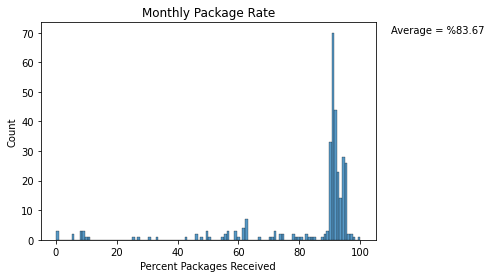

In [30]:
ax = sns.histplot(data = TPR, x = "RATE_SUCCESS")
ax.set(xlabel = "Percent Packages Received", title = "Monthly Package Rate")
ax.text(110, 70, "Average = %"  + "{:.2f}".format(TPR["RATE_SUCCESS"].mean()))

Text(110, 1200, 'Average = %88.70')

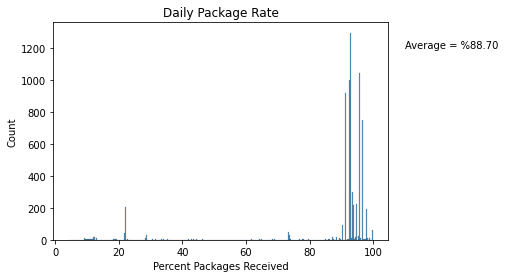

In [31]:
ax = sns.histplot(data = DPR, x = "RATE_SUCCESS")
ax.set(xlabel = "Percent Packages Received", title = "Daily Package Rate")
ax.text(110, 1200, "Average = %" + "{:.2f}".format(DPR["RATE_SUCCESS"].mean()))